<a href="https://colab.research.google.com/github/csubham2370/Major-Project-using-ML-and-Python-Framework-Flask/blob/main/Crop_Recommendation_System2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By combining these imports, you're setting up your Python environment for data analysis, visualization, and machine learning tasks while also configuring it to handle warnings in a specific way.

In [1]:
# Importing libraries

from __future__ import print_function # This line imports the 'print_funcation' feature from the '__further__'model.it ensures that the script will use the print funcation from python 3.x even if it's running in a python 2.x environment.

import pandas as pd # This line imports the pandas library and assigns it the alias 'pd'. Pandas is a powerful data manipulation and analysis library for Python.

import numpy as np # This line imports the NumPy library and assigns it the alias 'np'. Numpy ia a fundamental package for numerical computing in Python, provading support for large multi-dimensional arrays and matrices, along with a collection of mathematical funcation to operate on these array.

import matplotlib.pyplot as plt # This line imports the pyplot module from the matplotlib library and assigns it the alias 'plt. Matplotlib is a plotting library for Python, and pyplot provides a MATLAB-like interface for creating and customizing plots.

import seaborn as sns # This line imports the seaborn library and assigns it the alias 'sns'. Seaborn is a statistical data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

from sklearn.metrics import classification_report # This line imports the 'classification_report' funcation from the 'metrics' module of the scikit-learn library. This funcation generates a comprehensive report for evaluating the performance of a classification model.

from sklearn import metrics # This line imports the 'metrics' module from scikit-learn. scikit-learn is a machine learning library for Python that provides simple and efficent tools for data mining and data analysis. The 'metrics' module contains various metrics for evaluating the performance of machine learning models.

from sklearn import tree # This line imports the tree module from scikit-learn. It provides tools for working with decision trees, which are a type of supervised learning algorithm used for classification and regression tasks.

import warnings # This line imports the warnings module, which provides a mechanism to control the behavior of warnings in Python code.

warnings.filterwarnings('ignore') # This line sets the warning filter to ignore all warnings. This is useful for suppressing warning messages that might not be relevant or useful for the current analysis. However, it's generally recommended to handle specific warnings appropriately rather than ignoring them altogether.

# Upload a file on Google Colab
This code allows the user to upload a file from their local system to a Google Colab notebook environment, and the uploaded file(s) information is stored in the uploaded variable for further processing within the notebook.

In [2]:
from google.colab import drive # Import the 'drive' module from the 'google.colab' package. This module is specifically designed for interacting with Google Drive in the Colab environment.

drive.mount('/content/gdrive') # Mount your Google Drive to the specified directory (/content/gdrive) within the Colab virtual machine. This allows you to access your Google Drive files directly in Colab notebooks as if they were local files. This line will prompt for authorization to access your Google Drive, and you'll need to follow the link, authenticate, and copy the authorization code back into Colab to complete the mounting process.

Mounted at /content/gdrive


# Importing the Data
This code reads the contents of a CSV file named 'modified_crop.csv' using Pandas and stores it in a DataFrame named crop for further processing and analysis in Python.


In [3]:
crop = pd.read_csv('/content/gdrive/My Drive/modified_crop.csv') #This line reads a CSV file named modified_crop.csv located in the My Drive directory of your mounted Google Drive. The function pd.read_csv() from the pandas library is used to load the CSV file into a pandas DataFrame named crop. This allows you to work with the data in the CSV file using pandas' powerful data manipulation tools within your Colab notebook.

crop # This line, when placed at the end of a cell in a Jupyter notebook or a Google Colab notebook, displays the DataFrame crop. It's a simple way to output and view the DataFrame contents directly in the notebook. If this line is part of a script in a different environment, it won't actually display the DataFrame unless wrapped in a print function or similar construct. In a notebook, it helps quickly visualize the data you've loaded.

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2545,8.0,28.0,38.0,23.225940,94.429714,6.844402,105.691786,pomegranate
2546,52.0,68.0,78.0,17.485041,16.960706,6.896552,86.050780,chickpea
2547,13.0,47.0,20.0,29.217800,87.937242,6.544502,43.138663,mungbean
2548,74.0,46.0,45.0,25.757349,88.366685,6.025029,189.426348,jute


# Checking the shape of data set
This code is use for quickly check the size of your DataFrame, which is especially useful when dealing with large datasets or when you need to understand the structure of the data you're working with.

For example, if you run crop.shape and it returns (100, 5), it means that the DataFrame crop has 100 rows and 5 columns. and the number of elements is 500.

In [4]:
  crop.shape # This line returns a tuple containing the number of rows and columns in the DataFrame crop.
             # The first element of the tuple represents the number of rows, and the second element represents the number of columns.
             # It's a quick way to ascertain the size or dimensions of the DataFrame, providing insight into the structure and size of the dataset loaded from the CSV file.

             #Tuples are immutable in nature. Thus, we cannot make changes after creating it.

(2550, 8)

# Checking the information of our dataset
By using crop.info(), you can quickly get an overview of the DataFrame, including its size, data types, and missing values, which is useful for initial data exploration and understanding the dataset's characteristics.

In [5]:
crop.info() # This line generates a summary of the DataFrame crop, including information about its index dtype, column dtypes, non-null values,
            # and memory usage. It's a useful method to quickly inspect the data types of each column, the presence of missing values, and an estimate of the memory usage of the DataFrame.
            # This summary helps in understanding the composition of the dataset and identifying potential issues or areas for further exploration or cleaning.
            #Strings are objects in Python. immutable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2530 non-null   float64
 1   P            2531 non-null   float64
 2   K            2528 non-null   float64
 3   temperature  2524 non-null   float64
 4   humidity     2532 non-null   float64
 5   ph           2533 non-null   float64
 6   rainfall     2529 non-null   float64
 7   label        2529 non-null   object 
dtypes: float64(7), object(1)
memory usage: 159.5+ KB


# Retrieves the first five rows of the DataFrame crop and displays them.
The purpose of using head() is to quickly inspect the structure and content of the DataFrame. It's often used as an initial step in data analysis to get a sense of what the data looks like before performing further operations. By examining the first few rows, you can check the column names, data types, and example values in the DataFrame.

In [6]:
crop.head() # This line retrieves the first five rows of the DataFrame crop and displays them.
            # The head() method is commonly used to preview the beginning of a DataFrame, providing a quick overview of the data's format,
            # column names, and some sample values. By default, it returns the first five rows, but you can specify a different number of rows to display by passing an argument to the head() method (e.g., crop.head(10),
            # to display the first ten rows). It's particularly useful for understanding the structure of the dataset and identifying any potential issues or patterns at the outset of data analysis.
            # If we passing the 0 as a parameter then only columns are print.

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


# Retrieves the last five rows of the DataFrame crop and displays them.
The purpose of using tail() is to quickly inspect the end of the DataFrame. It's often used to check for patterns or trends in the data, especially if the data is ordered chronologically or by some other criteria. By examining the last few rows, you can see the most recent data entries and verify that the DataFrame has been properly loaded or processed.

In [7]:
crop.tail() # This line retrieves the last five rows of the DataFrame crop and displays them.
            # The tail() method is frequently used to preview the end of a DataFrame, offering a rapid overview of the data's format, column names, and some example values.
            # By default, it returns the last five rows, but you can specify a different number of rows to display by passing an argument to the tail() method (e.g., crop.tail(10) to display the last ten rows).
            # It's especially useful for understanding the structure of the dataset and identifying any potential issues or patterns towards the conclusion of data analysis.

,N,P,K,temperature,humidity,ph,rainfall,label
2545,8.0,28.0,38.0,23.225940,94.429714,6.844402,105.691786,pomegranate
2546,52.0,68.0,78.0,17.485041,16.960706,6.896552,86.050780,chickpea
2547,13.0,47.0,20.0,29.217800,87.937242,6.544502,43.138663,mungbean
2548,74.0,46.0,45.0,25.757349,88.366685,6.025029,189.426348,jute
2549,2.0,30.0,30.0,26.001751,94.799984,6.331052,209.540094,coconut


# Checking the null values
crop.isnull().sum() gives you a Series where each entry represents the number of missing values in the corresponding column of the crop DataFrame. This information is useful for identifying and handling missing data in your dataset.

In [8]:
crop.isnull().sum() # This line applies the isnull() method to the DataFrame crop, which returns a DataFrame of the same shape as crop with True for missing values (NaNs) and False for non-missing values.
                    # Then, the sum() method is applied to this resulting DataFrame, which calculates the sum of True values (i.e., the number of missing values) for each column.
                    # The result is a Series where the index represents column names, and the values represent the total number of missing values in each column.
                    # This summary is useful for identifying columns with missing data and assessing the extent of missingness in the dataset, which informs decisions about data cleaning or imputation strategies.


N              20
P              19
K              22
temperature    26
humidity       18
ph             17
rainfall       21
label          21
dtype: int64

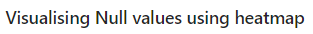

<Axes: >

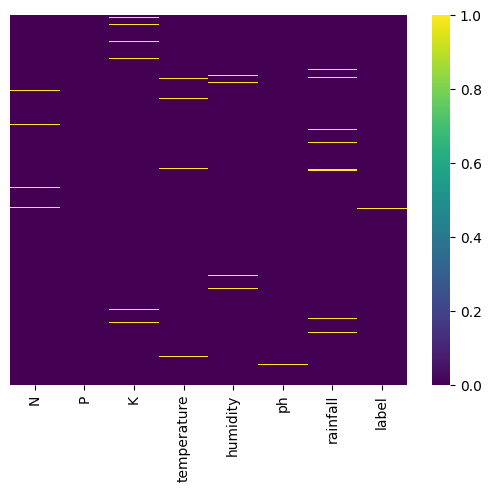

In [9]:
sns.heatmap(crop.isnull(),yticklabels=False,cbar=True,cmap='viridis') # This line creates a heatmap using Seaborn's heatmap() function. The input to this function is the DataFrame crop with the isnull() method applied,
                                                                      # which returns a DataFrame of the same shape with True for missing values and False for non-missing values.
                                                                      # This DataFrame is used as the data for the heatmap, where missing values are represented as True (1) and non-missing values as False (0).
                                                                      # The yticklabels=False parameter removes the y-axis tick labels, making the heatmap cleaner.
                                                                      # The cbar=True parameter adds a color bar to the side of the heatmap, indicating the scale of the colors.
                                                                      # The cmap='viridis' parameter sets the color map to 'viridis', which is a perceptually uniform color map that helps in distinguishing different levels,
                                                                      # of missingness. The resulting heatmap provides a visual representation of missing values in the dataset,
                                                                      # making it easier to identify patterns of missingness across different columns.

# Calculating the sum of all null values
crop.isnull().sum().sum() gives you the total number of missing values in the entire DataFrame crop, summing up the counts of missing values across all columns. This information is valuable for understanding the extent of missing data in your dataset

In [10]:
crop.isnull().sum().sum()

164

# Calculating the sum of all duplicate values
crop.duplicated().sum() gives you the total number of duplicated rows in the DataFrame crop. This information is useful for identifying and handling duplicate entries in your dataset.

In [11]:
crop.duplicated().sum() # This line applies the duplicated() method to the DataFrame crop, which returns a boolean Series indicating whether each row is,
                        # a duplicate of a previous row. The sum() method is then used to count the total number of True values in this Series,
                        # indicating the total number of duplicate rows in the DataFrame. This calculation provides insight into the presence of duplicate data entries in the dataset,
                        # which can affect analysis and should be handled appropriately, such as by removing duplicates to ensure data integrity.

350

# Handling Null values

,N,P,K,temperature,humidity,ph,rainfall,label
count,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,muskmelon
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142
mean,50.108627,52.863922,47.772941,25.349813,71.026880,6.428380,102.339497,NaN
std,37.150616,33.261496,50.695692,5.667161,23.106526,0.930378,54.992971,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,20.000000,27.000000,20.000000,22.609407,59.835934,5.962001,64.348819,NaN
50%,37.000000,50.000000,31.500000,25.539465,80.457953,6.429899,94.735907,NaN
75%,84.000000,68.000000,49.000000,28.540157,90.015064,6.912300,122.444151,NaN


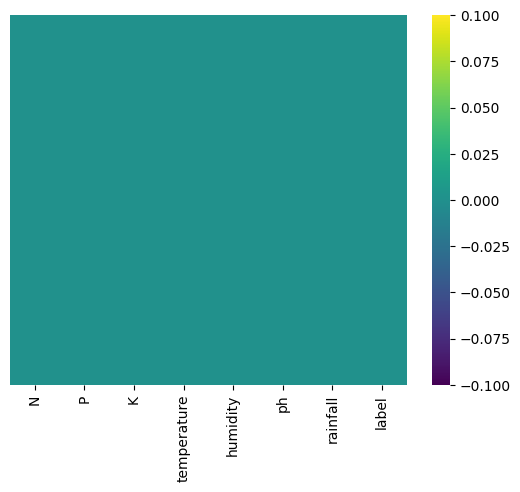

In [12]:
# Atfirst we copy the data into crop1 variable.

crop1 = crop.copy()  # This line creates a copy of the DataFrame crop and assigns it to a new variable crop1.
              # This ensures that any modifications made to crop1 won't affect the original DataFrame crop.

              # These lines fill missing values in specific columns of the DataFrame crop1 with predetermined values.
              # Numeric columns are filled with 0, while the 'label' column is filled with the mode value.

# Filling null values in 'Nitrogen' with 0
crop1.N.fillna(0, inplace=True)

# Filling null values in 'Phosphorus' with 0
crop1.P.fillna(0, inplace=True)

# Filling null values in 'Potassium' with 0
crop1.K.fillna(0, inplace=True)

# Filling null values in 'Temperature' with 0
crop1.temperature.fillna(0, inplace=True)

# Filling null values in 'Humidity' with 0
crop1.humidity.fillna(0, inplace=True)

# Filling null values in 'ph' with 0
crop1.ph.fillna(0, inplace=True)

# Filling null values in 'Rainfall' with 0
crop1.rainfall.fillna(0, inplace=True)

#Filling null values in 'Label' with 0
crop1.label.fillna(crop1.label.mode()[0], inplace=True)




# Check for null values
sns.heatmap(crop1.isnull(),yticklabels=False,cbar=True,cmap='viridis')

# Describe the data
crop1.describe(include="all")

# Count: The total number of non-missing values in each column.
# Unique: The number of unique categories in the column. This is relevant only for categorical data. NaN indicates that the column is numeric.
# Top: The most frequently occurring category in the column. Again, only relevant for categorical data.
# Freq: The frequency of the top category.
# Mean: The average value of the column.
# Std (Standard Deviation): Measures the amount of variation or dispersion of the data.
# Min: The smallest value in the column.
# 25% (First Quartile): The value below which 25% of the data falls.
# 50% (Median): The middle value of the data.
# 75% (Third Quartile): The value below which 75% of the data falls.
# Max: The largest value in the column.

# Here we recheck if any null value is present or not.

In [13]:
crop1.isnull().sum()  # This line applies the isnull() method to the DataFrame crop1, resulting in a DataFrame of the same shape with,
                      # True for missing values and False for non-missing values. Then, the sum() method is used to calculate the sum of True values,
                      #  (i.e., the number of missing values) for each column. The result is a Series where the index represents column names,
                      # and the values represent the total number of missing values in each column.
                      # This summary provides an overview of missing values in the dataset after the data preprocessing steps applied earlier.

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

# Here we recheck if any null value is present or not by heatmap

<Axes: >

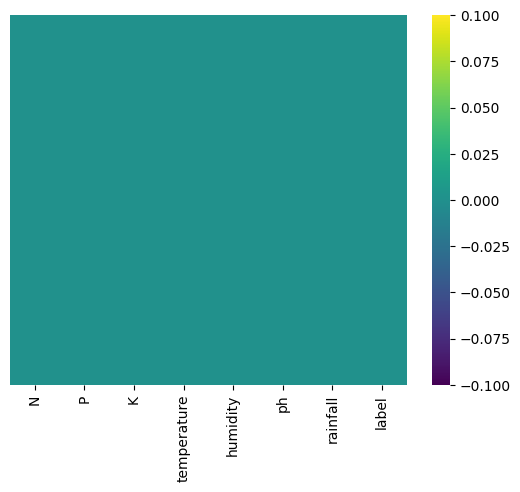

In [14]:
sns.heatmap(crop1.isnull(),yticklabels=False,cbar=True,cmap='viridis')

# Drop the Duplicate values




the DataFrame crop2 contains the data from crop1 with duplicate rows removed. This operation ensures that each row in crop2 is unique, based on all columns by default.

In [15]:
crop2 = crop1.drop_duplicates()   # This line of code creates a new DataFrame named crop2 by applying the drop_duplicates() method to the DataFrame crop1.
                                  # The drop_duplicates() method removes duplicate rows from the DataFrame based on all columns' values.
                                  # After removing duplicates, the resulting DataFrame crop2 contains only unique rows, with duplicate rows eliminated.
                                  # This operation ensures that each row in the DataFrame crop2 is unique, which can be useful for various analyses where,
                                  # duplicate rows are not desired.


# Here we recheck if any duplicate rows are present or not.

In [16]:
 crop2.duplicated().sum()  # This line of code applies the duplicated() method to the DataFrame crop2.
                           # The duplicated() method returns a boolean Series indicating whether each row is a duplicate of an earlier row or not.
                           # True values indicate duplicate rows, while False values indicate unique rows.
                           # The sum() method is then used to count the total number of True values in the Series,
                           # representing the total number of duplicate rows in the DataFrame crop2.
                           # This count provides information about the number of duplicate rows remaining in the DataFrame after removing duplicates,
                           # with the drop_duplicates() method earlier. It helps to assess the effectiveness of the duplicate removal process.
                           # If the count is zero, it indicates that no duplicate rows remain in the DataFrame crop2.

0

# Here we check if any null value is present or not.
returns a Series where each entry represents whether there are any missing values in the corresponding column of the DataFrame crop2. If the entry is True, it means that the column contains at least one missing value; otherwise, it's False.

In [17]:
crop2.isnull().any() # This line of code applies the isnull() method to the DataFrame crop2.
                     # The isnull() method returns a DataFrame of the same shape as crop2, where each element is True if the corresponding element in crop2 is null (NaN), and False otherwise.
                     # The any() method is then applied to the resulting DataFrame, which returns a boolean Series indicating whether there are any True values along each column axis (axis=0). True indicates the presence of at least one missing value (NaN) in the column, while False indicates that the column contains no missing values.
                     # The output provides information about the presence of missing values in each column of the DataFrame crop2. If a column has True, it means there is at least one missing value in that column. Otherwise, the column contains no missing values.

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

## After remove the null values and duplicates values we check the shape of the data set

In [18]:
crop2.shape


(2200, 8)

# Describe method computes summary statistics for each numerical column in the dataFrame
The output of crop2.describe() will be a DataFrame where each row represents a summary statistic, and each column represents a numerical column in the original DataFrame crop2. This summary statistics can provide insights into the distribution and spread of values in the dataset, helping with data exploration and analysis.

In [19]:
crop2.describe() # This line of code calls the describe() method on the DataFrame crop2.
                 # The describe() method computes summary statistics for each numerical column in the DataFrame, including count, mean, standard deviation, minimum, 25th percentile (first quartile), median (50th percentile),
                 # 75th percentile (third quartile), and maximum.
                 # For categorical columns, describe() provides count, unique, top (most frequent value), and freq (frequency of the top value).
                 # This summary provides valuable insights into the central tendency, dispersion, and distribution of numerical data in the DataFrame crop2, as
                 # well as the frequency and distribution of categorical data. It helps in understanding the overall characteristics of the dataset and identifying potential outliers or anomalies.

                 # Describe Function In Python Pandas

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.182727,52.975455,47.643182,25.363830,70.926162,6.424093,102.457727
std,37.077482,33.241552,50.630203,5.661025,23.041266,0.947815,55.638149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.750000,27.000000,20.000000,22.629467,59.791831,5.955956,63.866827
50%,37.000000,51.000000,31.000000,25.549620,80.381232,6.421510,94.354745
75%,84.000000,68.000000,48.000000,28.546521,89.892282,6.922373,122.747122
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


* Count: The total number of non-missing values in each column.
* Mean: The average value of the column.
* Std (Standard Deviation): Measures the amount of variation or dispersion of the data.
* Min: The smallest value in the column.
* 25% (First Quartile): The value below which 25% of the data falls.
* 50% (Median): The middle value of the data.
* 75% (Third Quartile): The value below which 75% of the data falls.
* Max: The largest value in the column.

# Identify relationships between variables in a dataset using correlation
The corr() method is commonly used to identify relationships between variables in a dataset. High positive or negative correlation coefficients can indicate strong relationships between variables, while a correlation coefficient close to 0 suggests little to no relationship. These correlation coefficients can be further analyzed and interpreted to gain insights into the dataset.

In [20]:
crop2_numeric = crop2.select_dtypes(include=[np.number])
corr = crop2_numeric.corr()
corr

# The first line selects only the numeric columns from the DataFrame crop2 and stores them in a new DataFrame called crop2_numeric.
# This is achieved using the select_dtypes() method with the include parameter set to [np.number], which selects columns with numeric data types.
# The second line calculates the correlation matrix for the numeric columns in the DataFrame crop2_numeric.
# The correlation matrix is a square matrix where each entry represents the correlation coefficient between two variables. It indicates the strength and direction of the linear relationship between pairs of variables.
# The third line displays the correlation matrix, showing the correlation coefficients between all pairs of numeric columns in the DataFrame crop2_numeric.
# Positive values indicate a positive correlation, negative values indicate a negative correlation, and values close to zero indicate little to no correlation.
# This matrix helps in understanding the relationships between different variables in the dataset, which is valuable for feature selection, dimensionality reduction, and predictive modeling tasks.

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.233342,-0.140195,0.014713,0.188735,0.076029,0.047011
P,-0.233342,1.000000,0.721855,-0.100031,-0.118327,-0.120868,-0.065516
K,-0.140195,0.721855,1.000000,-0.136565,0.181556,-0.142574,-0.054479
temperature,0.014713,-0.100031,-0.136565,1.000000,0.159112,-0.029349,-0.022207
humidity,0.188735,-0.118327,0.181556,0.159112,1.000000,-0.008846,0.079741
ph,0.076029,-0.120868,-0.142574,-0.029349,-0.008846,1.000000,-0.088785
rainfall,0.047011,-0.065516,-0.054479,-0.022207,0.079741,-0.088785,1.000000


* This correlation matrix represents the correlation coefficients between pairs of numeric variables in the dataset.
* The value of 1.000 along the diagonal represents the correlation of each variable with itself, which is always perfect (perfect positive correlation).
* Off-diagonal values represent the correlation between pairs of variables. Each cell contains the correlation coefficient, which ranges from -1 to 1.
* A value of 1 indicates a perfect positive correlation, meaning that as one variable increases, the other also increases proportionally.
* A value of -1 indicates a perfect negative correlation, meaning that as one variable increases, the other decreases proportionally.
* A value close to 0 indicates little to no linear correlation between the variables.
* For example, the correlation coefficient between 'N' and 'P' is approximately -0.233, indicating a moderate negative correlation between these two variables.
* Similarly, the correlation coefficient between 'K' and 'humidity' is approximately 0.182, indicating a moderate positive correlation between these two variables.

#Visualizing the correlation matrix
 By visualizing the correlation matrix as a heatmap, you can easily identify patterns and relationships between variables in the dataset. Positive correlations will appear in warm colors, negative correlations in cool colors, and no correlation in neutral colors. The annotations provide the exact correlation coefficients, making it easier to interpret the heatmap.

<Axes: >

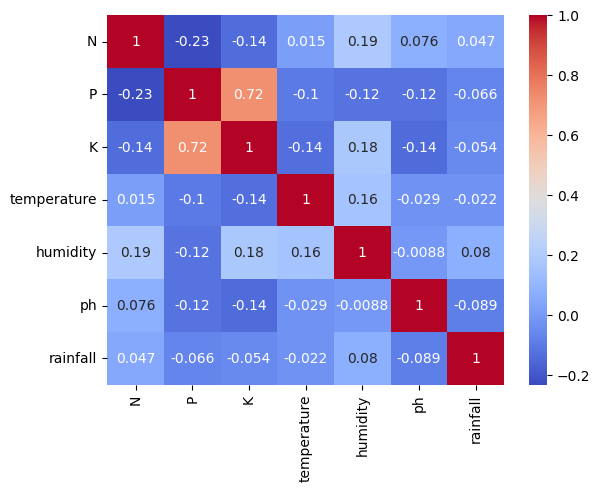

In [21]:
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm') # Generate a heatmap to visualize the correlation matrix 'corr' with annotations





**Comments**:
- The `sns.heatmap()` function from the Seaborn library is used to create a heatmap.
- The `corr` parameter specifies the correlation matrix that we want to visualize.
- Setting `annot=True` adds annotations to each cell of the heatmap, displaying the correlation coefficients.
- The `cbar=True` parameter adds a color bar to the side of the heatmap, indicating the scale of the colors.
- The `cmap='coolwarm'` parameter sets the color map to 'coolwarm', which ranges from cool (blue) to warm (red), representing negative and positive correlations respectively.
- This visualization helps in understanding the strength and direction of the linear relationships between pairs of variables in the dataset, making it easier to identify patterns and dependencies.

# Calculates the total number of elements in the DataFrame crop2.(columns * rows)
The .size method in Python is used to get the number of elements in an object, such as a list, tuple, set, or dictionary. However, it seems you've added parentheses to the method, which is not correct for this purpose.

In [22]:
 crop2.size

17600

* This line of code calculates the total number of elements in the DataFrame crop2.
* The size attribute of a DataFrame returns the total number of elements, which is equal to the number of rows multiplied by the number of columns.
* The result represents the total number of data points or cells in the DataFrame crop2, including both numeric and categorical values.

# Show the all columns in the dataset.
The .columns attribute is used to retrieve the column labels of a DataFrame in pandas.

In [23]:
 crop2.columns # Retrieve the column names of the DataFrame 'crop2'


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

* This line of code retrieves the column names of the DataFrame crop2.
* The columns attribute of a DataFrame returns an Index object containing the column names.
* The result represents the names of all columns in the DataFrame crop2.

# Here we display all the unique target labels in a dataset.
The code crop2['label'].unique() is used to get the unique values in the 'label' column of the DataFrame crop2.


In [24]:
crop2['label'].unique() # Retrieve unique values from the 'label' column in the DataFrame 'crop2'

array(['rice', 'muskmelon', 'maize', 'chickpea', 'kidneybeans',
       'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil',
       'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)



**Comments**:
- This line of code accesses the 'label' column of the DataFrame `crop2`.
- The `.unique()` method is then applied to this column, which returns an array of unique values present in the 'label' column.
- The result represents an array containing all unique values found in the 'label' column of the DataFrame `crop2`.
- This operation is useful for understanding the different categories or classes present in the 'label' column, providing insights into the diversity of crops or labels present in the dataset.

# Here we check all the data types of the dataframe
The dtypes attribute in pandas DataFrame is used to get the data types of each column in the DataFrame.

In [25]:
 crop2.dtypes # Retrieve the data types of each column in the DataFrame 'crop2'

N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [26]:
crop2

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,coffee
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee



**Comments**:
- This line of code returns the data types of each column in the DataFrame `crop2`.
- The `dtypes` attribute of a DataFrame provides information about the data type of each column.
- The result is a Series where the index represents column names, and the values represent the corresponding data types of each column in `crop2`.
- Understanding the data types is important for data manipulation and analysis, as it informs about the nature of the data stored in each column (e.g., integer, float, object, etc.), helping in appropriate data handling and processing.

# Here we check the frequency of the unique label in the labels column.

* The output of crop2['label'].value_counts() will be a Series where each unique label in the 'label' column of crop2 is listed along with the count of occurrences of that label in the dataset. This information is useful for understanding the distribution of different labels in the dataset and can be valuable for various analytical purposes.

In [27]:
crop2['label'].value_counts() # Count the occurrences of each unique value in the 'label' column of the DataFrame 'crop2'

label
muskmelon      117
mango          100
jute           100
chickpea       100
kidneybeans    100
coconut        100
mothbeans      100
papaya         100
blackgram      100
apple          100
grapes         100
rice            99
banana          99
pomegranate     99
lentil          99
pigeonpeas      99
watermelon      98
orange          98
mungbean        98
cotton          98
maize           98
coffee          98
Name: count, dtype: int64




**Comments**:
- This line of code accesses the 'label' column of the DataFrame `crop2`.
- The `.value_counts()` method is then applied to this column, which returns a Series containing the count of each unique value in the 'label' column.
- The index of the resulting Series represents the unique values found in the 'label' column, and the corresponding values represent the frequency of each unique value.
- This operation is useful for understanding the distribution of different categories or classes in the 'label' column, providing insights into the frequency of occurrence of each crop label in the dataset.

#Histogram presentation of values in the 'N' column of the DataFrame crop2.



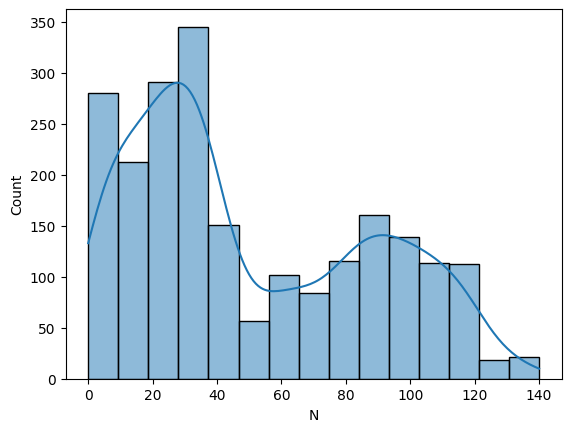

In [28]:
sns.histplot(crop2['N'], kde=True)  # This will create a histogram with a KDE curve overlaid

plt.show() # Display the plot









**Comments**:
* Use sns.histplot to create a histogram of the data in the column N of the DataFrame crop2, with kde=True to overlay the KDE.
* Display Plot: Use plt.show() to render and display the plot.
* This will create a histogram with a KDE curve overlaid, providing a visual representation of the distribution of the N values in the crop2 DataFrame.

#Histogram presentation of values in the 'P' column of the DataFrame crop2.



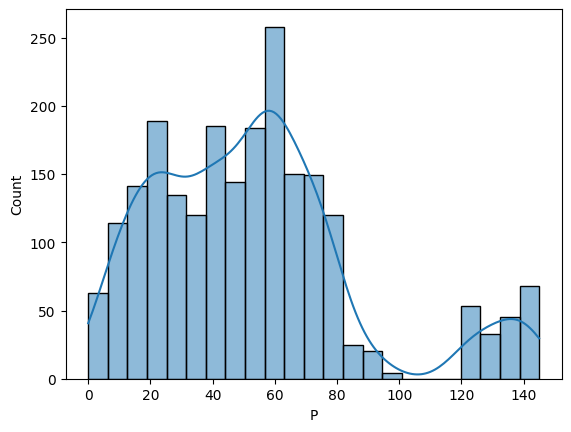

In [29]:
sns.histplot(crop2['P'], kde=True)
plt.show()

#Distribution plot of K, Temperature, Humidity, ph, Rainfall using Seaborn's distplot() function.

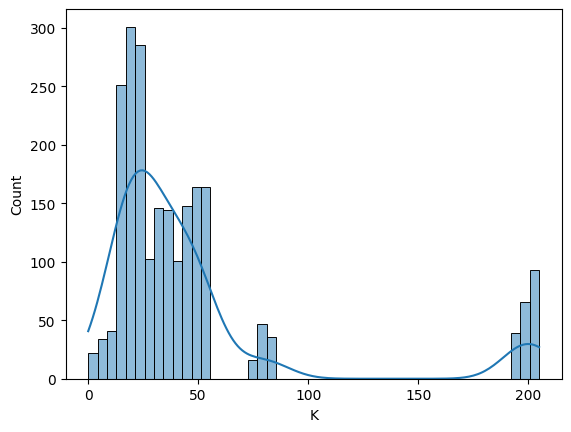

In [30]:
sns.histplot(crop2['K'], kde=True)
plt.show()

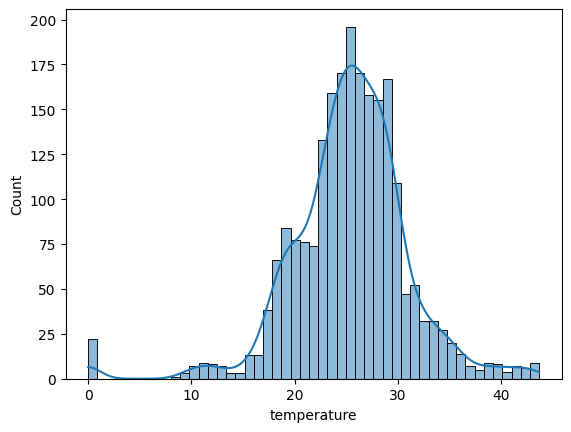

In [31]:
sns.histplot(crop2['temperature'], kde=True)
plt.show()

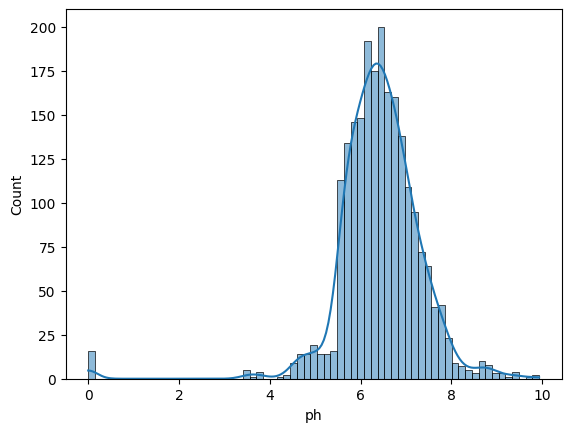

In [32]:
sns.histplot(crop2['ph'], kde=True)
plt.show()

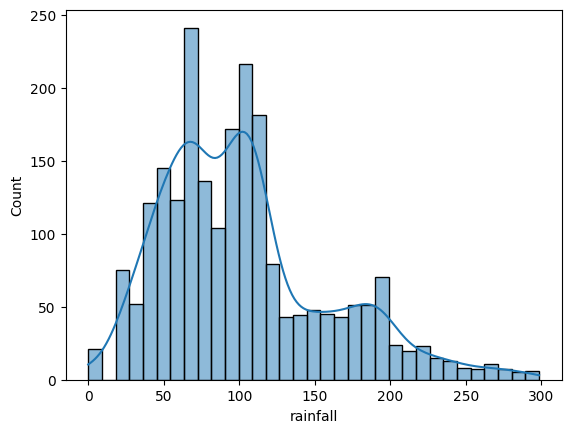

In [33]:
sns.histplot(crop2['rainfall'], kde=True)
plt.show()

#Checking the outliers using boxplot
**Outliers:**
Outliers is datapoint that stands out significantly from the rest of the data. we also say outliers is datapoints that are far away from the observation.

* It can be extremely high or low value compared to the other observation in a dataset.



Text(0.5, 1.0, 'Before')

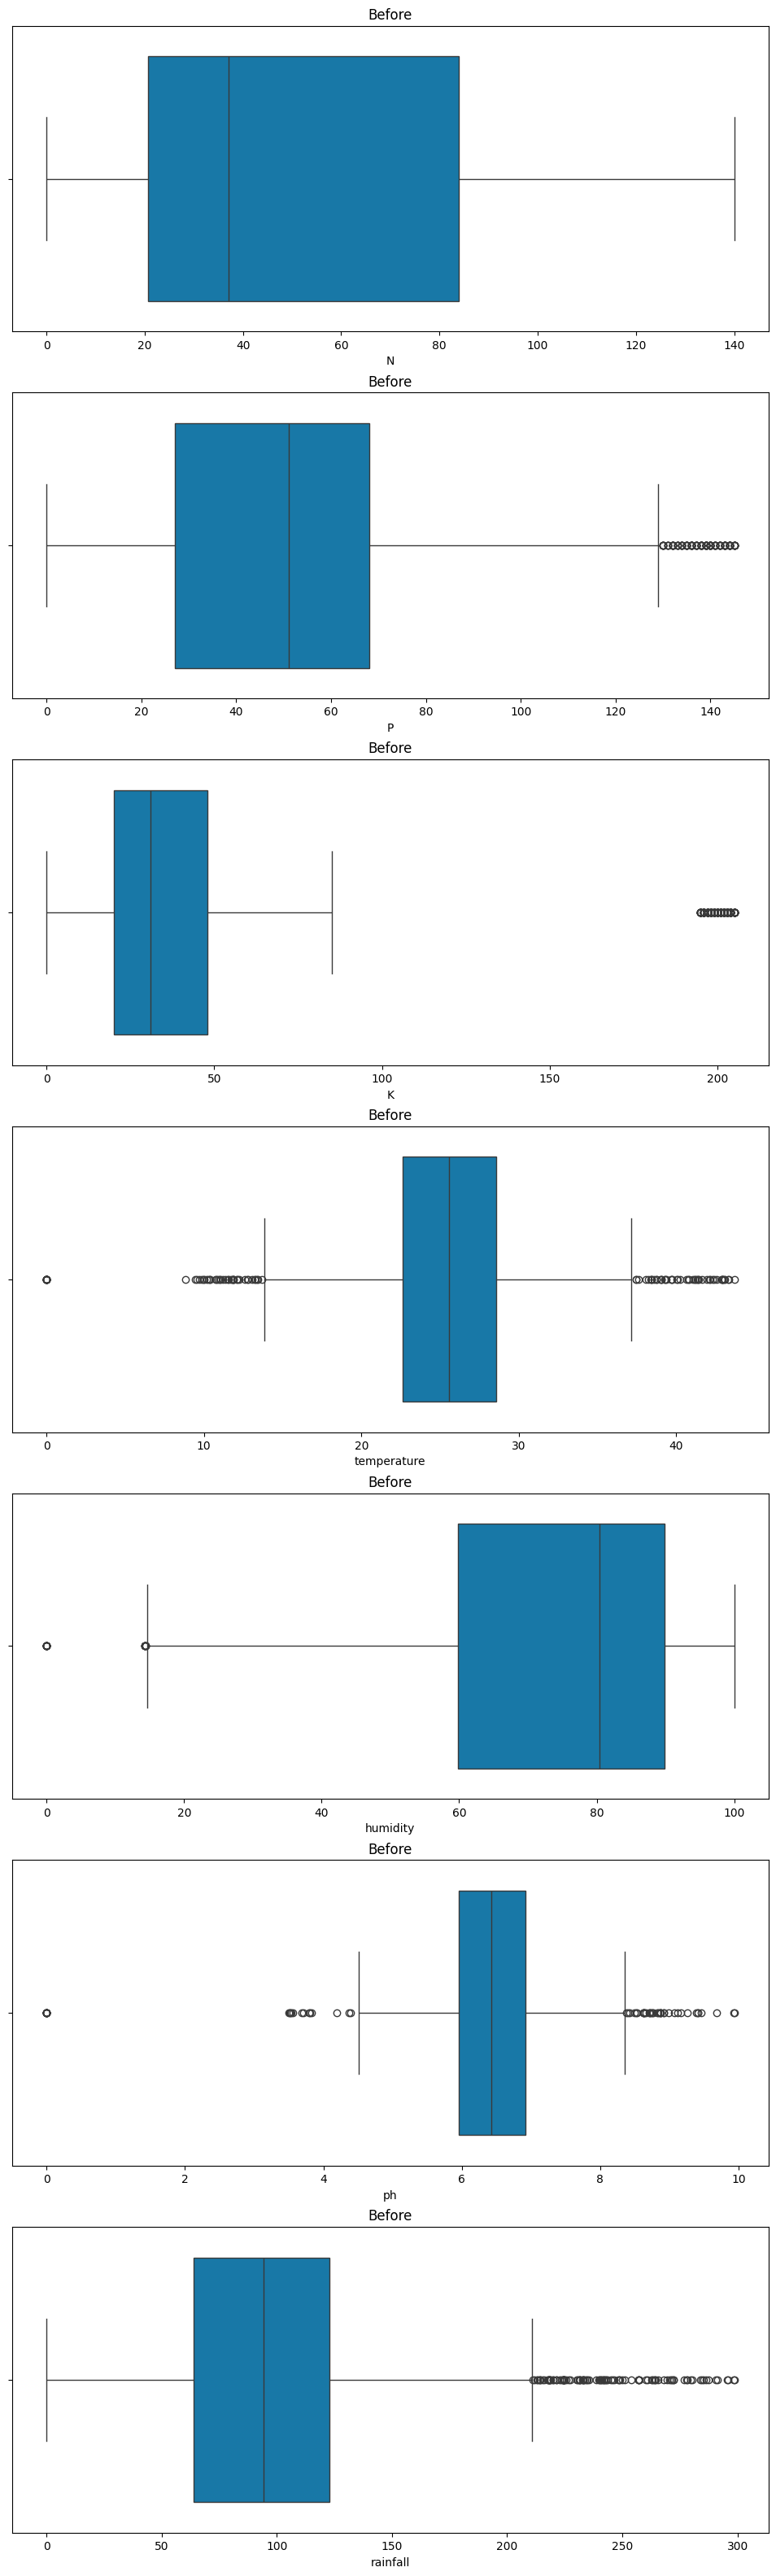

In [34]:
f, axes = plt.subplots(7, 1, figsize=(12,40))
sns.boxplot(x="N", data=crop2, palette="winter", ax=axes[0]).set_title("Before")
plt.grid()

sns.boxplot(x="P", data=crop2, palette="winter", ax=axes[1]).set_title("Before")
plt.grid()

sns.boxplot(x="K", data=crop2, palette="winter", ax=axes[2]).set_title("Before")
plt.grid()

sns.boxplot(x="temperature", data=crop2, palette="winter", ax=axes[3]).set_title("Before")
plt.grid()

sns.boxplot(x="humidity", data=crop2, palette="winter", ax=axes[4]).set_title("Before")
plt.grid()

sns.boxplot(x="ph", data=crop2, palette="winter", ax=axes[5]).set_title("Before")
plt.grid()

sns.boxplot(x="rainfall", data=crop2, palette="winter", ax=axes[6]).set_title("Before")


# Comments:

# This code generates a figure with 7 rows and 1 columns of subplots to display boxplots for each feature in the dataset.
# Each subplot represents a boxplot for a specific feature.
# The boxplots are created using Seaborn's sns.boxplot() function, with the x parameter specifying the feature to be plotted and the data parameter specifying the dataset (crop2).
# The palette parameter sets the color palette for the boxplots.
# Each subplot is given a title using .set_title(), indicating that these are the boxplots before any modification.
# plt.grid() adds a grid to each subplot for better visualization of the distribution of values.
# Finally, plt.tight_layout() ensures proper spacing between subplots, and plt.show() displays the plot.

# Check and clean the outliers of P

<Axes: xlabel='P'>

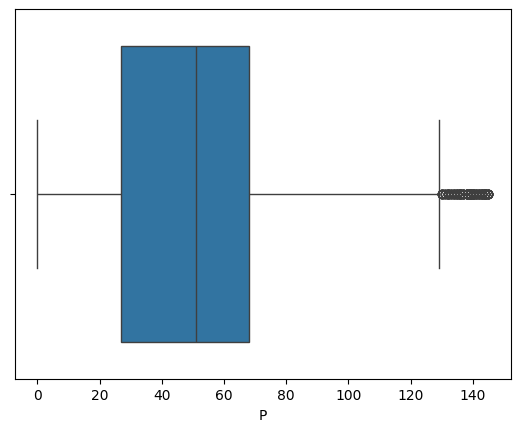

In [35]:
sns.boxplot(x=crop2['P'])

# creates a deep copy of the DataFrame crop2

In [36]:
crop3 = crop2.copy()
crop3
len(crop3)

2200

Comments:

* crop2.copy() creates a deep copy of the DataFrame crop2, ensuring that any changes made to crop3 do not affect crop2.
* crop3 is then displayed, likely to inspect the content or structure of the copied DataFrame.
* len(crop3) calculates the length of crop3, which represents the number of rows in the DataFrame. This can provide information about the size of the dataset.

# No any outliers in 'N' so we can't remove the outliers of 'N'.

#  Handel the outliers using IQR method

In [37]:
# Step 1: Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the 'P' column
Q1 = crop3['P'].quantile(0.25)
Q3 = crop3['P'].quantile(0.75)
IQR = Q3 - Q1

# Display the calculated quartiles and IQR
print('Q1=',Q1,', Q3=', Q3,', IQR=' ,IQR)

# Step 2: Define the upper and lower limits for what is considered an outlier

upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

# Display the defined upper and lower limits
print("lower_limit=",lower_limit)
print("upper_limit",upper_limit)

# Find the outliers in the 'P' column based on the defined limits
crop3.loc[(crop3['P'] > upper_limit) | (crop3['P'] < lower_limit)]

# Trimming the data by removing outliers and creating a new DataFrame
new_df = crop3.loc[(crop3['P'] < upper_limit) & (crop3['P'] > lower_limit)]

# Display the number of rows before and after removing outliers, as well as the number of outliers removed
print("before removing outliers:",len(crop3))
print("after removing outliers:",len(new_df))
print("outliers:",len(crop3)-len(new_df))

Q1= 27.0 , Q3= 68.0 , IQR= 41.0
lower_limit= -34.5
upper_limit 129.5
before removing outliers: 2200
after removing outliers: 2069
outliers: 131


* Comments:
* Step 1 calculates the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the 'P' column, which are essential for identifying outliers.
* Step 2 defines the upper and lower limits for what is considered an outlier based on the calculated quartiles and IQR.
* Outliers are then identified in the 'P' column based on the defined upper and lower limits.
* Trimming the data involves creating a new DataFrame (new_df) that contains only the rows where the 'P' column values are within the defined limits, effectively removing outliers.
* The number of rows before and after removing outliers is displayed, along with the number of outliers removed.

# check the outliers by the help of boxplot in 'P' column

<Axes: xlabel='P'>

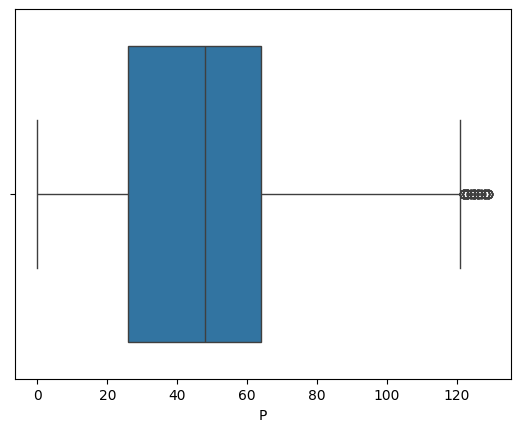

In [38]:
sns.boxplot(x=new_df['P'])

In [39]:
#Capping
# Create a copy of the DataFrame crop3 and assign it to new_df
new_df = crop3.copy()

# Cap the values in the 'P' column that exceed the upper limit by setting them to the upper limit
new_df.loc[(new_df['P'] > upper_limit), 'P'] = upper_limit

# Cap the values in the 'P' column that are below the lower limit by setting them to the lower limit
new_df.loc[(new_df['P'] < lower_limit), 'P'] = lower_limit

* Comments:

* The first line creates a copy of the DataFrame crop3 and assigns it to a new DataFrame new_df. This ensures that any modifications made to new_df do not affect crop3.
* The second line caps the values in the 'P' column of new_df that exceed the upper limit by setting them to the upper limit.
* The third line caps the values in the 'P' column of new_df that are below the lower limit by setting them to the lower limit.

<Axes: xlabel='P'>

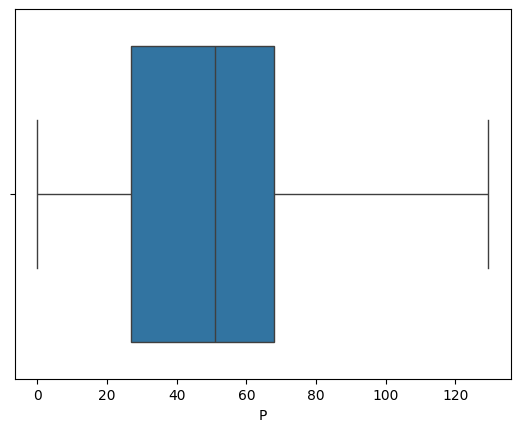

In [40]:
sns.boxplot(x=new_df['P'])

# Check and clean the outliers of K

<Axes: xlabel='K'>

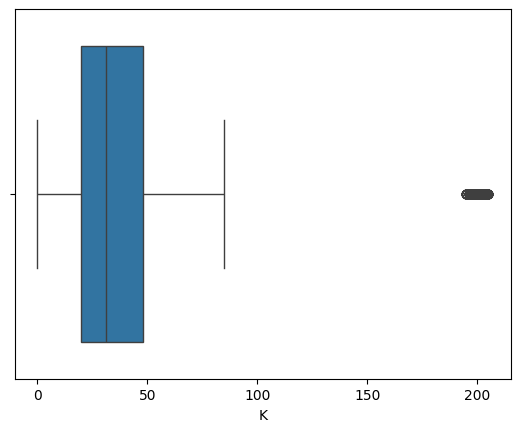

In [41]:
sns.boxplot(x=crop2['K'])

In [42]:
# Step 1: Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the 'N' column
Q1 = crop3['K'].quantile(0.25)
Q3 = crop3['K'].quantile(0.75)
IQR = Q3 - Q1

# Display the calculated quartiles and IQR
print('Q1=',Q1,', Q3=', Q3,', IQR=' ,IQR)

# Step 2: Define the upper and lower limits for what is considered an outlier

upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

# Display the defined upper and lower limits
print("lower_limit=",lower_limit)
print("upper_limit",upper_limit)

# Find the outliers in the 'N' column based on the defined limits
crop3.loc[(crop3['K'] > upper_limit) | (crop3['K'] < lower_limit)]

# Trimming the data by removing outliers and creating a new DataFrame
new_df = crop3.loc[(crop3['K'] < upper_limit) & (crop3['K'] > lower_limit)]

# Display the number of rows before and after removing outliers, as well as the number of outliers removed
print("before removing outliers:",len(crop3))
print("after removing outliers:",len(new_df))
print("outliers:",len(crop3)-len(new_df))

Q1= 20.0 , Q3= 48.0 , IQR= 28.0
lower_limit= -22.0
upper_limit 90.0
before removing outliers: 2200
after removing outliers: 2002
outliers: 198


* Comments:

* Step 1 calculates the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the 'N' column, which are essential for identifying outliers.
* Step 2 defines the upper and lower limits for what is considered an outlier based on the calculated quartiles and IQR.
* Outliers are then identified in the 'N' column based on the defined upper and lower limits.
* Trimming the data involves creating a new DataFrame (new_df) that contains only the rows where the 'N' column values are within the defined limits, effectively removing outliers.
* The number of rows before and after removing outliers is displayed, along with the number of outliers removed.

<Axes: xlabel='K'>

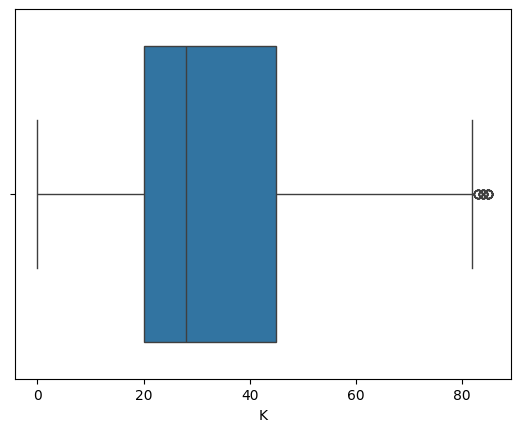

In [43]:
sns.boxplot(x=new_df['K'])

In [44]:
# Create a copy of the DataFrame crop3 and assign it to new_df
new_df = crop3.copy()

# Cap the values in the 'K' column that exceed the upper limit by setting them to the upper limit
new_df.loc[(new_df['K'] > upper_limit), 'K'] = upper_limit

# Cap the values in the 'K' column that are below the lower limit by setting them to the lower limit
new_df.loc[(new_df['K'] < lower_limit), 'K'] = lower_limit

* Comments:

* The first line creates a copy of the DataFrame crop3 and assigns it to a new DataFrame new_df. This ensures that any modifications made to new_df do not affect crop3.
* The second line caps the values in the 'K' column of new_df that exceed the upper limit by setting them to the upper limit.
* The third line caps the values in the 'K' column of new_df that are below the lower limit by setting them to the lower limit.

<Axes: xlabel='K'>

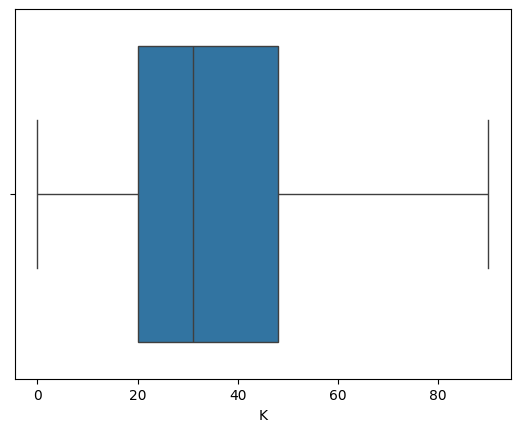

In [45]:
sns.boxplot(x=new_df['K'])

# Check and clean the outliers of temperature

<Axes: xlabel='temperature'>

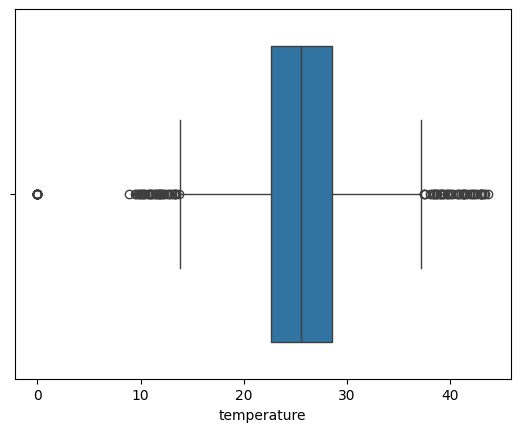

In [46]:
sns.boxplot(x=crop2['temperature'])

In [47]:
# Step 1: Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the 'temperature' column
Q1 = crop3['temperature'].quantile(0.25)
Q3 = crop3['temperature'].quantile(0.75)
IQR = Q3 - Q1

# Display the calculated quartiles and IQR
print('Q1=',Q1,', Q3=', Q3,', IQR=' ,IQR)

# Step 2: Define the upper and lower limits for what is considered an outlier

upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

# Display the defined upper and lower limits
print("lower_limit=",lower_limit)
print("upper_limit",upper_limit)

# Find the outliers in the 'temperature' column based on the defined limits
crop3.loc[(crop3['temperature'] > upper_limit) | (crop3['temperature'] < lower_limit)]

# Trimming the data by removing outliers and creating a new DataFrame
new_df = crop3.loc[(crop3['temperature'] < upper_limit) & (crop3['temperature'] > lower_limit)]

# Display the number of rows before and after removing outliers, as well as the number of outliers removed
print("before removing outliers:",len(crop3))
print("after removing outliers:",len(new_df))
print("outliers:",len(crop3)-len(new_df))

Q1= 22.629466635 , Q3= 28.546521374999998 , IQR= 5.9170547399999975
lower_limit= 13.753884525000004
upper_limit 37.422103484999994
before removing outliers: 2200
after removing outliers: 2093
outliers: 107


* Comments:

* Step 1 calculates the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the 'temperature' column, which are essential for identifying outliers.
* Step 2 defines the upper and lower limits for what is considered an outlier based on the calculated quartiles and IQR.
* Outliers are then identified in the 'temperature' column based on the defined upper and lower limits.
* Trimming the data involves creating a new DataFrame (new_df) that contains only the rows where the 'temperature' column values are within the defined limits, effectively removing outliers.
* The number of rows before and after removing outliers is displayed, along with the number of outliers removed.

<Axes: xlabel='temperature'>

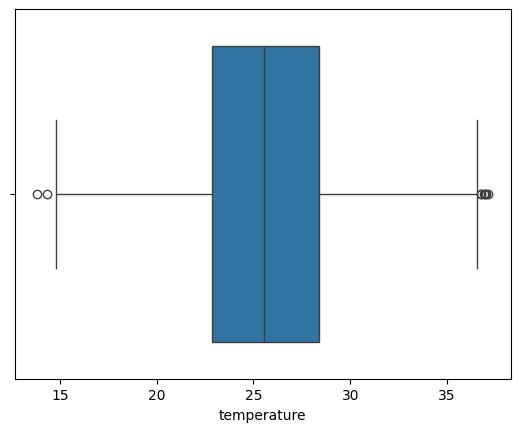

In [48]:
sns.boxplot(x=new_df['temperature'])

In [49]:
#Capping
# Create a copy of the DataFrame crop3 and assign it to new_df
new_df = crop3.copy()

# Cap the values in the 'temperature' column that exceed the upper limit by setting them to the upper limit
new_df.loc[(new_df['temperature'] > upper_limit), 'temperature'] = upper_limit

# Cap the values in the 'temperature' column that are below the lower limit by setting them to the lower limit
new_df.loc[(new_df['temperature'] < lower_limit), 'temperature'] = lower_limit

* Comments:

* The first line creates a copy of the DataFrame crop3 and assigns it to a new DataFrame new_df. This ensures that any modifications made to new_df do not affect crop3.
* The second line caps the values in the 'P' column of new_df that exceed the upper limit by setting them to the upper limit.
* The third line caps the values in the 'P' column of new_df that are below the lower limit by setting them to the lower limit.

<Axes: xlabel='temperature'>

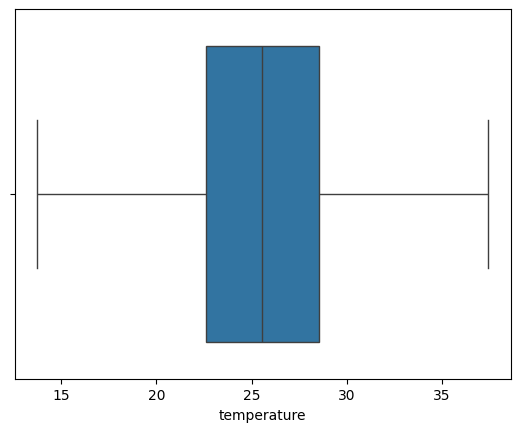

In [50]:
sns.boxplot(x=new_df['temperature'])

#  Check and clean the outliers of humidity

<Axes: xlabel='humidity'>

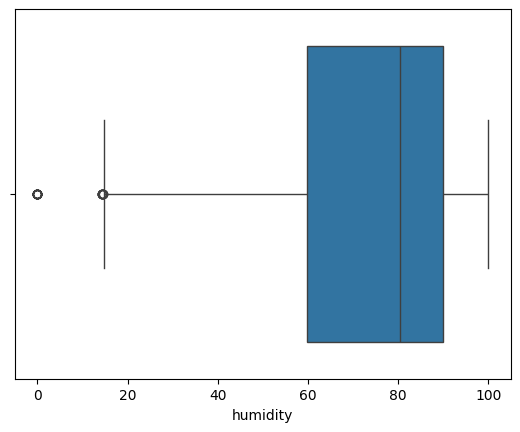

In [51]:
sns.boxplot(x=crop3['humidity'])

In [52]:
# Step 1: Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the 'humidity' column
Q1 = crop3['humidity'].quantile(0.25)
Q3 = crop3['humidity'].quantile(0.75)
IQR = Q3 - Q1

# Display the calculated quartiles and IQR
print('Q1=',Q1,', Q3=', Q3,', IQR=' ,IQR)

# Step 2: Define the upper and lower limits for what is considered an outlier

upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

# Display the defined upper and lower limits
print("lower_limit=",lower_limit)
print("upper_limit",upper_limit)

# Find the outliers in the 'humidity' column based on the defined limits
crop3.loc[(crop3['humidity'] > upper_limit) | (crop3['humidity'] < lower_limit)]

# Trimming the data by removing outliers and creating a new DataFrame
new_df = crop3.loc[(crop3['humidity'] < upper_limit) & (crop3['humidity'] > lower_limit)]

# Display the number of rows before and after removing outliers, as well as the number of outliers removed
print("before removing outliers:",len(crop3))
print("after removing outliers:",len(new_df))
print("outliers:",len(crop3)-len(new_df))

Q1= 59.79183075 , Q3= 89.892282115 , IQR= 30.100451364999998
lower_limit= 14.641153702500006
upper_limit 135.04295916249998
before removing outliers: 2200
after removing outliers: 2175
outliers: 25


* Comments:

* Step 1 calculates the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the 'humidity' column, which are essential for identifying outliers.
* Step 2 defines the upper and lower limits for what is considered an outlier based on the calculated quartiles and IQR.
* Outliers are then identified in the 'humidity' column based on the defined upper and lower limits.
* Trimming the data involves creating a new DataFrame (new_df) that contains only the rows where the 'humidity' column values are within the defined limits, effectively removing outliers.
* The number of rows before and after removing outliers is displayed, along with the number of outliers removed.

<Axes: xlabel='humidity'>

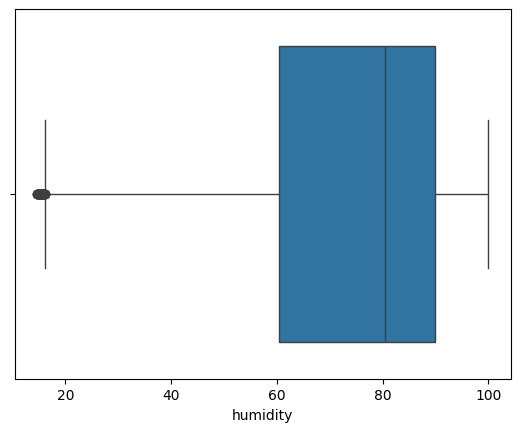

In [53]:
sns.boxplot(x=new_df['humidity'])

In [54]:
#Capping
# Create a copy of the DataFrame crop3 and assign it to new_df
new_df = crop3.copy()

# Cap the values in the 'humidity' column that exceed the upper limit by setting them to the upper limit
new_df.loc[(new_df['humidity'] > upper_limit), 'humidity'] = upper_limit

# Cap the values in the 'humidity' column that are below the lower limit by setting them to the lower limit
new_df.loc[(new_df['humidity'] < lower_limit), 'humidity'] = lower_limit

* Comments:

* The first line creates a copy of the DataFrame crop3 and assigns it to a new DataFrame new_df. This ensures that any modifications made to new_df do not affect crop3.
* The second line caps the values in the 'humidity' column of new_df that exceed the upper limit by setting them to the upper limit.
* The third line caps the values in the 'humidity' column of new_df that are below the lower limit by setting them to the lower limit.

<Axes: xlabel='humidity'>

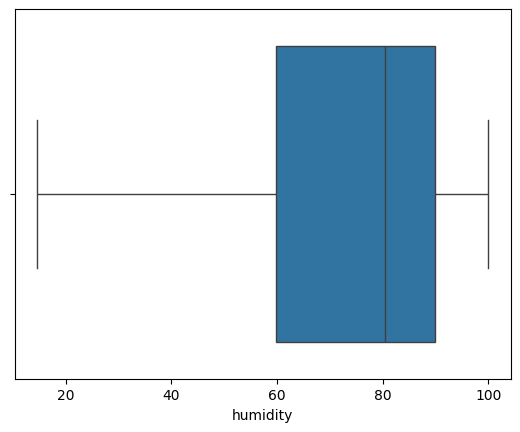

In [55]:
sns.boxplot(x=new_df['humidity'])

# Check and clean the outliers of ph

<Axes: xlabel='ph'>

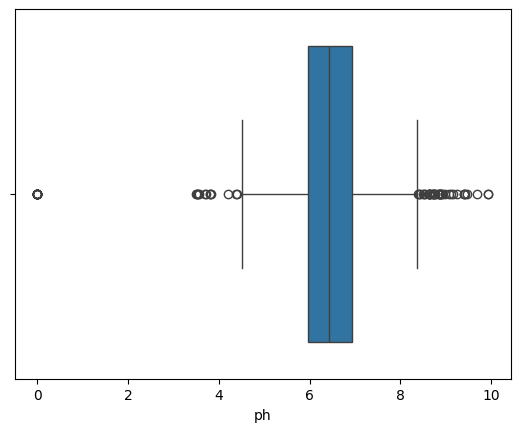

In [56]:
sns.boxplot(x=crop3['ph'])

In [57]:
# Step 1: Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the 'ph' column
Q1 = crop3['ph'].quantile(0.25)
Q3 = crop3['ph'].quantile(0.75)
IQR = Q3 - Q1

# Display the calculated quartiles and IQR
print('Q1=',Q1,', Q3=', Q3,', IQR=' ,IQR)

# Step 2: Define the upper and lower limits for what is considered an outlier

upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

# Display the defined upper and lower limits
print("lower_limit=",lower_limit)
print("upper_limit",upper_limit)

# Find the outliers in the 'ph' column based on the defined limits
crop3.loc[(crop3['ph'] > upper_limit) | (crop3['ph'] < lower_limit)]

# Trimming the data by removing outliers and creating a new DataFrame
new_df = crop3.loc[(crop3['ph'] < upper_limit) & (crop3['ph'] > lower_limit)]

# Display the number of rows before and after removing outliers, as well as the number of outliers removed
print("before removing outliers:",len(crop3))
print("after removing outliers:",len(new_df))
print("outliers:",len(crop3)-len(new_df))

Q1= 5.955956037 , Q3= 6.92237275125 , IQR= 0.9664167142500002
lower_limit= 4.506330965625
upper_limit 8.371997822625001
before removing outliers: 2200
after removing outliers: 2133
outliers: 67


* Comments:

* Step 1 calculates the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the 'ph' column, which are essential for identifying outliers.
* Step 2 defines the upper and lower limits for what is considered an outlier based on the calculated quartiles and IQR.
* Outliers are then identified in the 'ph' column based on the defined upper and lower limits.
* Trimming the data involves creating a new DataFrame (new_df) that contains only the rows where the 'ph' column values are within the defined limits, effectively removing outliers.
* The number of rows before and after removing outliers is displayed, along with the number of outliers removed.

<Axes: xlabel='ph'>

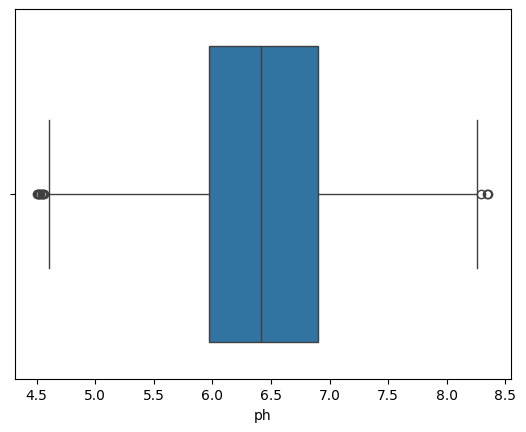

In [58]:
sns.boxplot(x=new_df['ph'])

In [59]:
#Capping
# Create a copy of the DataFrame crop3 and assign it to new_df
new_df = crop3.copy()

# Cap the values in the 'ph' column that exceed the upper limit by setting them to the upper limit
new_df.loc[(new_df['ph'] > upper_limit), 'ph'] = upper_limit

# Cap the values in the 'ph' column that are below the lower limit by setting them to the lower limit
new_df.loc[(new_df['ph'] < lower_limit), 'ph'] = lower_limit

* Comments:

* The first line creates a copy of the DataFrame crop3 and assigns it to a new DataFrame new_df. This ensures that any modifications made to new_df do not affect crop3.
* The second line caps the values in the 'ph' column of new_df that exceed the upper limit by setting them to the upper limit.
* The third line caps the values in the 'ph' column of new_df that are below the lower limit by setting them to the lower limit.

<Axes: xlabel='ph'>

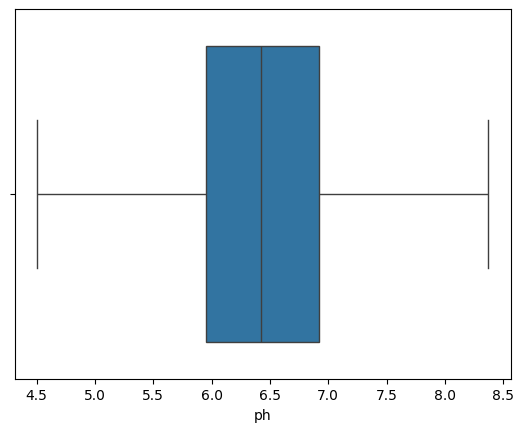

In [60]:
sns.boxplot(x=new_df['ph'])

# Check and clean the outliers of rainfall

<Axes: xlabel='rainfall'>

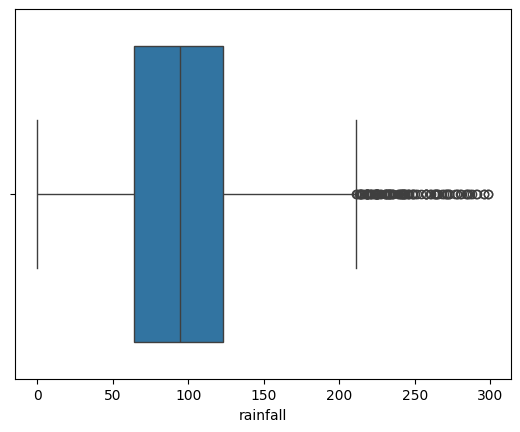

In [61]:
sns.boxplot(x=crop3['rainfall'])

In [62]:
# Step 1: Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the 'rainfall' column
Q1 = crop3['rainfall'].quantile(0.25)
Q3 = crop3['rainfall'].quantile(0.75)
IQR = Q3 - Q1

# Display the calculated quartiles and IQR
print('Q1=',Q1,', Q3=', Q3,', IQR=' ,IQR)

# Step 2: Define the upper and lower limits for what is considered an outlier

upper_limit = Q3 + (1.5 * IQR)
lower_limit = Q1 - (1.5 * IQR)

# Display the defined upper and lower limits
print("lower_limit=",lower_limit)
print("upper_limit",upper_limit)

# Find the outliers in the 'rainfall' column based on the defined limits
crop3.loc[(crop3['rainfall'] > upper_limit) | (crop3['rainfall'] < lower_limit)]

# Trimming the data by removing outliers and creating a new DataFrame
new_df = crop3.loc[(crop3['rainfall'] < upper_limit) & (crop3['rainfall'] > lower_limit)]

# Display the number of rows before and after removing outliers, as well as the number of outliers removed
print("before removing outliers:",len(crop3))
print("after removing outliers:",len(new_df))
print("outliers:",len(crop3)-len(new_df))

Q1= 63.86682675 , Q3= 122.747122125 , IQR= 58.880295375
lower_limit= -24.453616312500003
upper_limit 211.0675651875
before removing outliers: 2200
after removing outliers: 2096
outliers: 104


* Comments:

* Step 1 calculates the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the 'rainfall' column, which are essential for identifying outliers.
* Step 2 defines the upper and lower limits for what is considered an outlier based on the calculated quartiles and IQR.
* Outliers are then identified in the 'rainfall' column based on the defined upper and lower limits.
* Trimming the data involves creating a new DataFrame (new_df) that contains only the rows where the 'rainfall' column values are within the defined limits, effectively removing outliers.
* The number of rows before and after removing outliers is displayed, along with the number of outliers removed.

<Axes: xlabel='rainfall'>

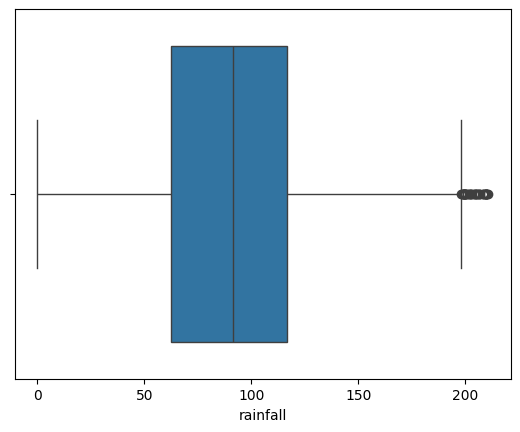

In [63]:
sns.boxplot(x=new_df['rainfall'])

In [64]:
#Capping
# Create a copy of the DataFrame crop3 and assign it to new_df
new_df = crop3.copy()

# Cap the values in the 'rainfall' column that exceed the upper limit by setting them to the upper limit
new_df.loc[(new_df['rainfall'] > upper_limit), 'rainfall'] = upper_limit

# Cap the values in the 'rainfall' column that are below the lower limit by setting them to the lower limit
new_df.loc[(new_df['rainfall'] < lower_limit), 'rainfall'] = lower_limit

* Comments:

* The first line creates a copy of the DataFrame crop3 and assigns it to a new DataFrame new_df. This ensures that any modifications made to new_df do not affect crop3.
* The second line caps the values in the 'rainfall' column of new_df that exceed the upper limit by setting them to the upper limit.
* The third line caps the values in the 'rainfall' column of new_df that are below the lower limit by setting them to the lower limit.

<Axes: xlabel='rainfall'>

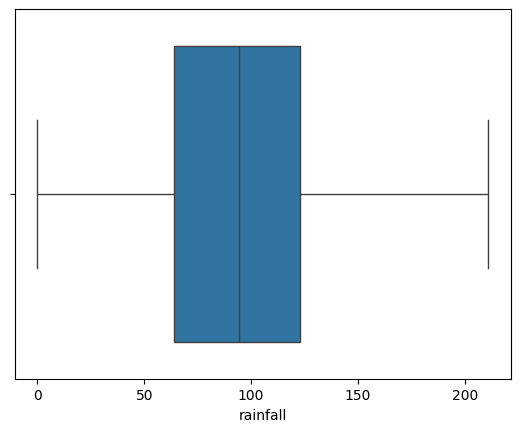

In [65]:
sns.boxplot(x=new_df['rainfall'])

# Visualising other attributes with respect to our target column i.e. 'Label'


<Axes: xlabel='rainfall', ylabel='label'>

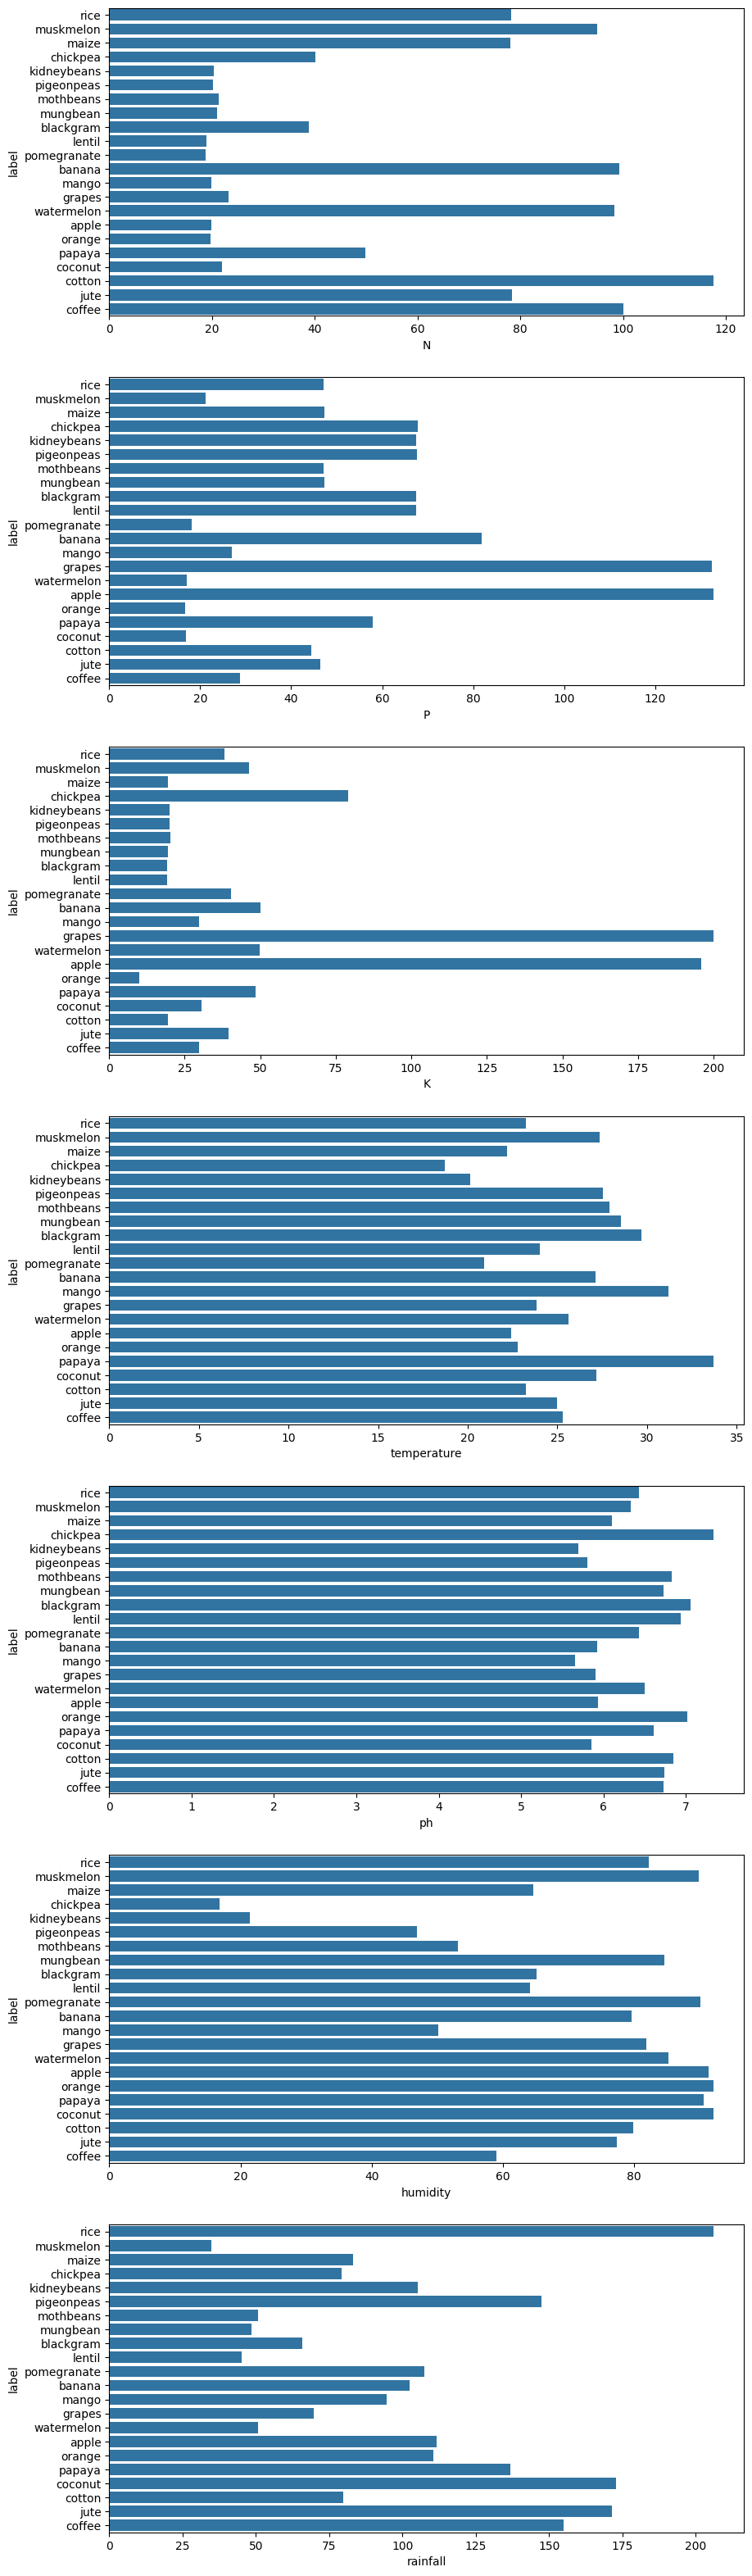

In [66]:
# Create subplots with 7 rows and 1 column, specifying the figure size
f, axes = plt.subplots(7, 1, figsize=(10, 40))

# Plot barplots for each feature in the dataset with respect to the 'label' column

# Barplot for feature 'N' with 'label' on the y-axis
sns.barplot(x=new_df.N, y=crop2.label, ax=axes.flat[0], errorbar=None)

# Barplot for feature 'P' with 'label' on the y-axis
sns.barplot(x=new_df.P, y=crop2.label, ax=axes.flat[1], errorbar=None)

# Barplot for feature 'K' with 'label' on the y-axis
sns.barplot(x=new_df.K, y=crop2.label, ax=axes.flat[2], errorbar=None)

# Barplot for feature 'temperature' with 'label' on the y-axis
sns.barplot(x=new_df.temperature, y=crop2.label, ax=axes.flat[3], errorbar=None)

# Barplot for feature 'ph' with 'label' on the y-axis
sns.barplot(x=new_df.ph, y=crop2.label, ax=axes.flat[4], errorbar=None)

# Barplot for feature 'humidity' with 'label' on the y-axis
sns.barplot(x=new_df.humidity, y=crop2.label, ax=axes.flat[5], errorbar=None)

# Barplot for feature 'rainfall' with 'label' on the y-axis
sns.barplot(x=new_df.rainfall, y=crop2.label, ax=axes.flat[6], errorbar=None)

# Comments:

# This code creates a set of subplots with 7 rows and 1 column, each representing a barplot for a specific feature with respect to the 'label' column.
# For each subplot:
# sns.barplot() is used to create a barplot, with the feature values on the x-axis and the 'label' column on the y-axis.
# The ax parameter specifies the axes object where the plot will be drawn. axes.flat[0], axes.flat[1], ..., axes.flat[6] are used to access each subplot in sequence.
# The features 'N', 'P', 'K', 'temperature', 'ph', 'humidity', and 'rainfall' are plotted against the 'label' column to visualize the distribution of these features with respect to different crop labels.
# plt.tight_layout() ensures proper spacing between subplots for better visualization.
# Finally, plt.show() displays the plot.


# Describe method computes summary statistics for each numerical column in the dataFrame

In [67]:
new_df.describe()


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.182727,52.975455,47.643182,25.363830,70.926162,6.424093,100.852162
std,37.077482,33.241552,50.630203,5.661025,23.041266,0.947815,51.589640
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.750000,27.000000,20.000000,22.629467,59.791831,5.955956,63.866827
50%,37.000000,51.000000,31.000000,25.549620,80.381232,6.421510,94.354745
75%,84.000000,68.000000,48.000000,28.546521,89.892282,6.922373,122.747122
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,211.067565


# Seperating features and target label
 this code prepares your data by selecting relevant features and the target variable for use in a machine learning model. The features are the input variables used to make predictions, while the target variable is the output variable you want to predict.

In [68]:
features =  new_df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target =   new_df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels =   new_df['label']

new_df2 = features.fillna(features.mean())

print("Features:",features.head(),sep="\n")
print("\n")
print("Target:",target.head(),sep="\n")
print("\n")
print("Shape of features:",features.shape)
print("Shape of target:",target.shape)


# Feature Selection:
# features = new_df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]: This line selects the columns 'N', 'P', 'K', 'temperature', 'humidity', 'ph', and 'rainfall' from the new_df DataFrame and assigns them to the variable features. These are presumably the input variables for a model.
# Target Selection:
# target = new_df['label']: This line selects the 'label' column from new_df, which is used as the target variable or the output that the model will predict.
# Handling Missing Values:
# new_df2 = features.fillna(features.mean()): This line creates a new DataFrame new_df2 where all missing values in features are replaced with the mean of their respective columns. This is a common method to handle missing data in numerical columns to avoid errors during modeling.
# Printing Outputs:
# print("Features:",features.head(),sep="\n"): Prints the first few rows of the features DataFrame to provide a quick look at the selected features.
# print("\n"): Adds a newline for better readability of the output.
# print("Target:",target.head(),sep="\n"): Prints the first few entries of the target to show what the model needs to predict.
# print("\n"): Another newline for clarity.
# print("Shape of features:",features.shape): Prints the shape (number of rows and columns) of the features DataFrame, providing information about the dataset size and feature count.
# print("Shape of target:",target.shape): Prints the shape of the target, which should typically be a single column with the same number of rows as features.

Features:
      N     P     K  temperature   humidity        ph    rainfall
0  90.0  42.0  43.0    20.879744  82.002744  6.502985  202.935536
1  85.0  58.0  41.0    21.770462  80.319644  7.038096  211.067565
2  60.0  55.0  44.0    23.004459  82.320763  7.840207  211.067565
3  74.0  35.0  40.0    26.491096  80.158363  6.980401  211.067565
4  78.0  42.0  42.0    20.130175  81.604873  7.628473  211.067565


Target:
0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object


Shape of features: (2200, 7)
Shape of target: (2200,)


# Initialzing empty lists to append all model's name and corresponding name
By initializing these lists, you're setting up a structure to collect and organize the results of model evaluation, likely for comparison or further analysis. As you evaluate different models, you can append their accuracy scores to the acc list and their names to the model list, allowing you to track and analyze the performance of each model.


In [69]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

### The line **from sklearn.model_selection import train_test_split** imports the train_test_split function from the sklearn.model_selection module. This function is commonly used in machine learning to split datasets into training and testing sets.

In [70]:
from sklearn.model_selection import train_test_split

 # Split the dataset into training and testing sets.

In [71]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.25,random_state =51)

print("Shape of Xtrain:",Xtrain.shape)
print("Shape of Ytrain:",Ytrain.shape)
print("Shape of Xtest:",Xtest.shape)
print("Shape of Ytest:",Ytest.shape)

# Splitting the Dataset:
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target, test_size=0.25, random_state=51): This line splits the features and target datasets into training and testing sets.
# features contains the input features used to predict the target variable.
# target contains the target variable that the model aims to predict.
# test_size=0.25 specifies that 25% of the data should be used for testing, and the remaining 75% will be used for training.
# random_state=51 sets the random seed for reproducibility.
# Printing the Shapes:
# print("Shape of Xtrain:", Xtrain.shape): Prints the shape (number of rows and columns) of the training features dataset Xtrain.
# print("Shape of Ytrain:", Ytrain.shape): Prints the shape of the training target dataset Ytrain.
# print("Shape of Xtest:", Xtest.shape): Prints the shape of the testing features dataset Xtest.
# print("Shape of Ytest:", Ytest.shape): Prints the shape of the testing target dataset Ytest.

Shape of Xtrain: (1650, 7)
Shape of Ytrain: (1650,)
Shape of Xtest: (550, 7)
Shape of Ytest: (550,)


# Now we will train our model

In machine learning (ML), model training involves the process of feeding data into a machine learning algorithm or model to enable it to learn patterns, relationships, and insights from the data.

##Decision Tree
Decision tree training involves recursively partitioning the input space (feature space) into smaller regions while aiming to minimize impurity or maximize information gain at each step.

In [72]:
from sklearn.tree import DecisionTreeClassifier, plot_tree # Importing plot_tree along with DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report # Importing accuracy_score and classification_report

# Create an instance of DecisionTreeClassifier with specified parameters
DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state=2, max_depth=5)

# Fit the decision tree classifier to the training data
DecisionTree.fit(Xtrain, Ytrain)

# Predict the target labels for the testing data
predicted_values_test = DecisionTree.predict(Xtest)

# Calculate the accuracy of the model on the testing data
testing_accuracy = accuracy_score(Ytest, predicted_values_test)

# Append the resulting accuracy to the acc list and the model name to the model list
acc.append(testing_accuracy)
model.append('Decision Tree')

# Print the testing accuracy of the decision tree classifier
print("Decision Tree's Testing Accuracy:", testing_accuracy)

# Print a classification report for the testing data
print("Classification Report for Testing Data:")
print(classification_report(Ytest, predicted_values_test))



Decision Tree's Testing Accuracy: 0.9054545454545454
Classification Report for Testing Data:
              precision    recall  f1-score   support

       apple       1.00      0.97      0.98        29
      banana       0.96      0.96      0.96        25
   blackgram       0.68      0.79      0.73        19
    chickpea       1.00      1.00      1.00        24
     coconut       0.92      1.00      0.96        23
      coffee       1.00      0.95      0.98        22
      cotton       0.91      1.00      0.95        30
      grapes       1.00      1.00      1.00        31
        jute       0.88      0.27      0.41        26
 kidneybeans       0.96      0.79      0.87        29
      lentil       0.88      0.75      0.81        20
       maize       0.86      0.95      0.90        20
       mango       1.00      0.86      0.92        28
   mothbeans       0.77      0.95      0.85        21
    mungbean       0.97      1.00      0.98        32
   muskmelon       1.00      0.86      0.9

* Training Accuracy: 0.9084848484848485: The training accuracy of the decision tree classifier is approximately 90.85%. This indicates that the model correctly predicts the class labels for about 92.85% of the training instances.

* Decision Tree's Testing Accuracy: 0.9054545454545454: The testing accuracy of the decision tree classifier is approximately 90.55%. This indicates that the model correctly predicts the class labels for about 90.55% of the testing instances.
* Classification Report for Testing Data:
* The classification report provides precision, recall, F1-score, and support for each class in the testing data:
* Precision: The proportion of true positive predictions out of all positive predictions made.
* Recall: The proportion of true positive predictions out of all actual positive instances.
* F1-score: The harmonic mean of precision and recall, providing a balance between them.
* Support: The number of actual occurrences of each class in the testing data.
* For example:
* For the class 'apple', precision is 1.00, recall is 0.97, and F1-score is 0.98, with a support of 29 instances.
* For the class 'banana', precision is 0.96, recall is 0.96, and F1-score is 0.96, with a support of 25 instances.

#Confusion matrix

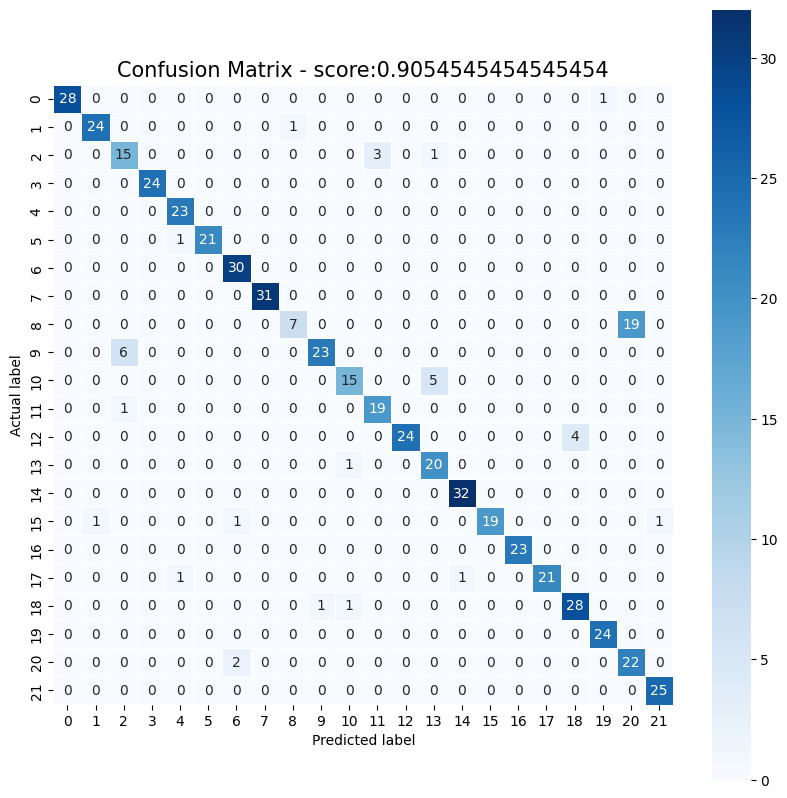

In [73]:
from sklearn.metrics import accuracy_score  # This line imports the accuracy_score function from the scikit-learn library, which is used to calculate the accuracy of a classification model.

from sklearn.metrics import confusion_matrix # This line imports the confusion_matrix function from the scikit-learn library, which is used to compute the confusion matrix to evaluate the accuracy of a classification.

cm = confusion_matrix(Ytest, predicted_values_test) #  This line computes the confusion matrix using the true labels (Ytest) and the predicted labels (predicted_values_test) obtained from the testing data.

plt.figure(figsize=(10,10)) # This line creates a new figure with a specified size for the plot.

sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues'); # This line creates a heatmap of the confusion matrix using Seaborn's heatmap function.
                                                                                      # It includes annotations (annot=True) to display the numerical values inside each cell of the heatmap,
                                                                                      # formats the annotations to display integers (fmt=".0f"), sets the linewidth of the gridlines to 0.5, makes the heatmap square (square=True),
                                                                                      # and chooses the color palette 'Blues'.

plt.ylabel('Actual label'); # This line sets the label for the y-axis of the heatmap to 'Actual label'.

plt.xlabel('Predicted label'); # his line sets the label for the x-axis of the heatmap to 'Predicted label'.

all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,predicted_values_test)) # This line calculates the accuracy score using the accuracy_score function and converts it to a string to be displayed as the title of the plot.

plt.title(all_sample_title, size = 15);  # This line sets the title of the plot to 'Confusion Matrix' along with the accuracy score, and adjusts the font size to 15.

plt.show() # This line displays the plot.

# Support Vector Machine (SVM)
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

In [74]:
from sklearn.svm import SVC # This line imports the Support Vector Classifier (SVC) from scikit-learn, which is used to implement Support Vector Machine (SVM) classification.
from sklearn.metrics import accuracy_score, classification_report  # This line imports the accuracy_score and classification_report functions from scikit-learn's metrics module, which are used to evaluate the performance of the classifier.



# Initializing the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42) # This line initializes the SVM classifier with a radial basis function (RBF) kernel (kernel='rbf'). The random_state parameter is set to ensure reproducibility of results.

# Training the SVM classifier
svm_classifier.fit(Xtrain, Ytrain) #This line trains the SVM classifier on the training data (Xtrain and Ytrain) using the fit method.

# Predicting on the testing set
y_pred = svm_classifier.predict(Xtest) #This line makes predictions on the testing set (Xtest) using the trained SVM classifier and stores the predicted labels in y_pred.

# Calculating accuracy
testing_accuracy = accuracy_score(Ytest, y_pred) #This line calculates the accuracy of the model by comparing the predicted labels (y_pred) with the true labels from the testing set (Ytest) using the accuracy_score function.
print("Test accuracy:", testing_accuracy)   #This line prints the test accuracy of the SVM classifier.

# Append accuracy and model name to respective lists
acc.append(testing_accuracy)
model.append('SVM')

# Generating classification report
print("Classification Report for Testing Data:") # This line prints a header indicating that the following output is the classification report for the testing data.

print(classification_report(Ytest, y_pred)) #This line generates and prints the classification report for the testing data using the classification_report function,
                                            #which includes metrics such as precision, recall, F1-score, and support for each class.

Test accuracy: 0.9472727272727273
Classification Report for Testing Data:
              precision    recall  f1-score   support

       apple       1.00      0.93      0.96        29
      banana       0.96      0.96      0.96        25
   blackgram       0.86      1.00      0.93        19
    chickpea       0.96      1.00      0.98        24
     coconut       0.92      1.00      0.96        23
      coffee       0.91      0.95      0.93        22
      cotton       0.94      1.00      0.97        30
      grapes       1.00      1.00      1.00        31
        jute       0.83      0.92      0.87        26
 kidneybeans       0.83      1.00      0.91        29
      lentil       0.95      0.90      0.92        20
       maize       0.95      0.95      0.95        20
       mango       0.97      1.00      0.98        28
   mothbeans       0.95      0.90      0.93        21
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      0.86      0.93        22
      o

Here are the comments for each line:

1. **Test accuracy**:
   - `Test accuracy: 0.9472727272727273`: This line prints the accuracy of the model on the testing data. The accuracy is approximately 94.73%.

2. **Classification Report for Testing Data**:
   - `Classification Report for Testing Data:`: This line indicates that the following output will be the classification report for the testing data.

3. **Precision, Recall, F1-score, and Support for each class**:
   - For the class `apple`:
     - Precision is 1.00, which means all instances classified as apple were actually apple.
     - Recall is 0.93, which means the model correctly identified 93% of all apple instances.
     - F1-score is 0.96, which is the harmonic mean of precision and recall.
     - Support is 29, which is the number of occurrences of apple in the testing data.
   - For the class `banana`, `blackgram`, `chickpea`, and `coconut`, similar metrics are provided.

These metrics provide a comprehensive evaluation of the model's performance for each class in the testing data.

# Confusion matrix

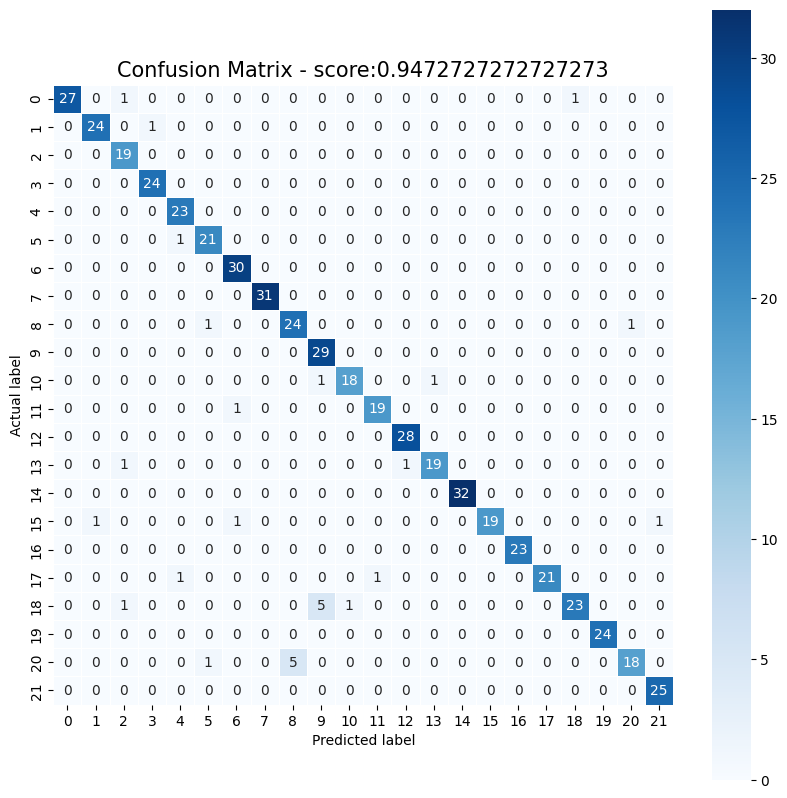

In [75]:
from sklearn.metrics import accuracy_score #This line imports the accuracy_score and confusion_matrix functions from scikit-learn's metrics module,
                                           #which are used to evaluate the performance of the classifier and generate the confusion matrix, respectively.

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytest, y_pred) #This line calculates the confusion matrix by comparing the true labels (Ytest) with the predicted labels (predicted_values_test) and stores the result in the variable cm.

plt.figure(figsize=(10,10)) #This line creates a new figure with a specified size (10x10 inches) for plotting the confusion matrix heatmap.

sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues'); #This line creates a heatmap plot of the confusion matrix using Seaborn's heatmap function.
                                                                                      #The cm matrix is passed as input, and the heatmap is annotated with the values of the matrix (annot=True).
                                                                                      #The format for displaying the values is specified as integers with no decimal places (fmt=".0f").
                                                                                      #The linewidths of the heatmap cells are set to 0.5, and the heatmap is drawn as a square (square=True).
                                                                                      #The colormap 'Blues' is used to represent the values.


plt.ylabel('Actual label'); #This line sets the label for the y-axis of the heatmap plot to 'Actual label'.

plt.xlabel('Predicted label'); #This line sets the label for the x-axis of the heatmap plot to 'Predicted label'.

all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,y_pred))  #This line creates a title for the heatmap plot, which includes the accuracy score calculated using accuracy_score.

plt.title(all_sample_title, size = 15); #This line sets the title of the heatmap plot to the all_sample_title variable, with a font size of 15.

plt.show() #This line displays the heatmap plot of the confusion matrix.

# Logistic Regression
Logistic regression is used for binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1.

For example, we have two classes Class 0 and Class 1 if the value of the logistic function for an input is greater than 0.5 (threshold value) then it belongs to Class 1 it belongs to Class 0. It’s referred to as regression because it is the extension of linear regression but is mainly used for classification problems.

In [76]:
from sklearn.linear_model import LogisticRegression #This line imports the LogisticRegression class from scikit-learn's linear_model module, which is used to implement logistic regression.
from sklearn.metrics import accuracy_score, classification_report #  This line imports the accuracy_score and classification_report functions from scikit-learn's metrics module,
                                                                  # which are used to evaluate the performance of the classifier.

LogReg = LogisticRegression(random_state=2) #This line initializes the logistic regression model with default parameters and sets the random state to ensure reproducibility of results.

LogReg.fit(Xtrain, Ytrain) #This line fits the logistic regression model to the training data (Xtrain and Ytrain) using the fit method.

predicted_values_test = LogReg.predict(Xtest) #This line makes predictions on the testing set (Xtest) using the trained logistic regression model and stores the predicted labels in predicted_values_test.

testing_accuracy = accuracy_score(Ytest, predicted_values_test) #This line calculates the accuracy of the logistic regression model by comparing the predicted labels (predicted_values_test)
                                                                # with the true labels from the testing set (Ytest) using the accuracy_score function.

acc.append(testing_accuracy) #This line appends the testing accuracy of the logistic regression model to a list named acc.

model.append('Logistic Regression') #This line appends the name of the model, 'Logistic Regression', to a list named model. These lists are likely used for comparison or further analysis.

print("Logistic Regression's Testing Accuracy:", testing_accuracy) #This line prints the testing accuracy of the logistic regression model.

print("Classification Report for Testing Data:") #This line prints a header indicating that the following output is the classification report for the testing data.

print(classification_report(Ytest, predicted_values_test)) #This line generates and prints the classification report for the testing data using the classification_report function,
                                                          #which includes metrics such as precision, recall, F1-score, and support for each class.


Logistic Regression's Testing Accuracy: 0.8927272727272727
Classification Report for Testing Data:
              precision    recall  f1-score   support

       apple       1.00      0.90      0.95        29
      banana       0.93      1.00      0.96        25
   blackgram       0.63      0.89      0.74        19
    chickpea       1.00      1.00      1.00        24
     coconut       0.92      1.00      0.96        23
      coffee       0.88      0.95      0.91        22
      cotton       0.89      0.80      0.84        30
      grapes       1.00      1.00      1.00        31
        jute       0.85      0.88      0.87        26
 kidneybeans       0.82      0.97      0.89        29
      lentil       0.78      0.70      0.74        20
       maize       0.86      0.90      0.88        20
       mango       0.93      0.96      0.95        28
   mothbeans       0.76      0.76      0.76        21
    mungbean       1.00      0.97      0.98        32
   muskmelon       0.71      0.77   

Here are the comments for the provided code:

1. **Printing Testing Accuracy**:
   - `print("Logistic Regression's Testing Accuracy:", testing_accuracy)`: This line prints the testing accuracy of the logistic regression model. The testing accuracy indicates the proportion of correctly classified instances in the testing set.

2. **Classification Report**:
   - `print("Classification Report for Testing Data:")`: This line prints a header indicating that the following output is the classification report for the testing data.
   - `print(classification_report(Ytest, predicted_values_test))`: This line generates and prints the classification report for the testing data using the `classification_report` function. The classification report includes precision, recall, F1-score, and support for each class in the target variable.

      - **Precision**: It measures the proportion of true positive predictions out of all positive predictions made by the model.
      - **Recall**: It measures the proportion of true positive predictions out of all actual positive instances in the data.
      - **F1-score**: It is the harmonic mean of precision and recall, providing a balance between the two metrics.
      - **Support**: It represents the number of actual occurrences of each class in the testing set.

   The classification report provides insights into how well the model performs for each class in terms of precision, recall, and F1-score.

# Confusion matrix

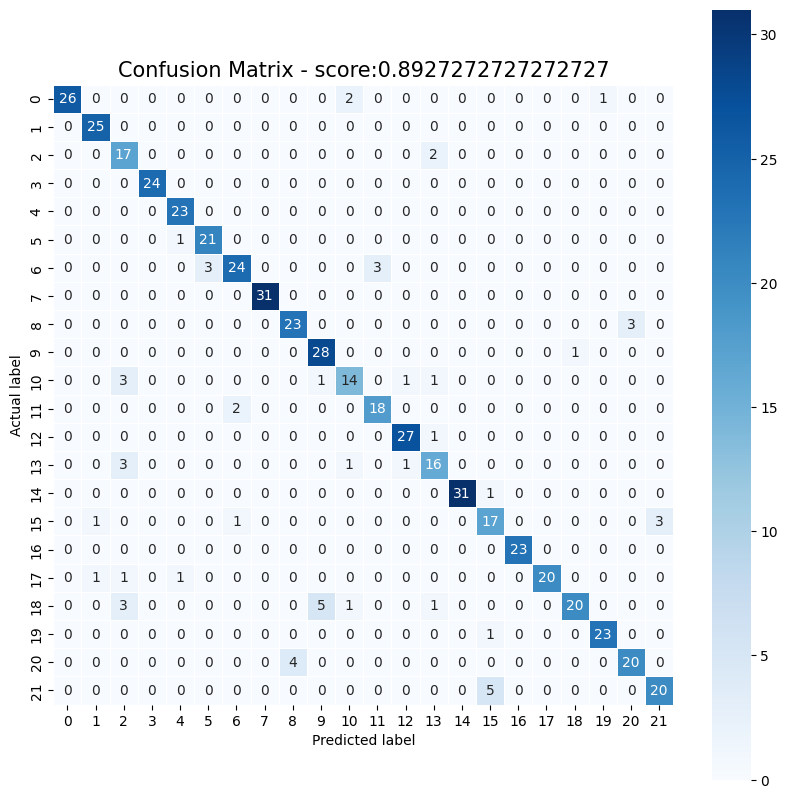

In [77]:
from sklearn.metrics import accuracy_score #This line imports the accuracy_score function from scikit-learn's metrics module, which is used to calculate the accuracy of a classification model.

from sklearn.metrics import confusion_matrix #This line imports the confusion_matrix function from scikit-learn's metrics module, which is used to compute the confusion matrix to evaluate the accuracy of a classification.

cm = confusion_matrix(Ytest, predicted_values_test) #This line calculates the confusion matrix using the true labels (Ytest) and the predicted labels (predicted_values_test) from the logistic regression model.

plt.figure(figsize=(10,10)) # This line initializes a new figure with a size of 10x10 inches for the heatmap plot.

sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues'); #This line creates a heatmap using Seaborn's heatmap function to visualize the confusion matrix.
                                                                                      #The annot=True parameter displays the numerical values in each cell, fmt=".0f" formats the displayed values as integers,
                                                                                      #linewidths=.5 sets the width of the lines between cells, square=True makes the plot square-shaped,
                                                                                      #and cmap='Blues' sets the color map to shades of blue.


plt.ylabel('Actual label'); #This line sets the label for the y-axis of the plot as 'Actual label'.

plt.xlabel('Predicted label'); #This line sets the label for the x-axis of the plot as 'Predicted label'.

all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest,predicted_values_test)) #This line creates a title for the plot that includes the accuracy score calculated using the accuracy_score function.

plt.title(all_sample_title, size = 15); #This line sets the title of the plot to all_sample_title with a font size of 15.

plt.show() #This line displays the plot.

# Random Forest
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [78]:
from sklearn.ensemble import RandomForestClassifier #This line imports the RandomForestClassifier class from scikit-learn's ensemble module, which is used to create a random forest classifier.

from sklearn.metrics import accuracy_score, classification_report #This line imports the accuracy_score function and classification_report function from scikit-learn's metrics module,
                                                                  #which are used to evaluate the performance of the random forest classifier.

RF = RandomForestClassifier(n_estimators=20, random_state=42,criterion='entropy',max_depth=5) #This line initializes a random forest classifier with 20 decision trees (n_estimators=20) and sets the random state to 0 for reproducibility.

RF.fit(Xtrain, Ytrain) #This line trains the random forest classifier on the training data (Xtrain and Ytrain).


predicted_values_test = RF.predict(Xtest) #This line predicts the labels for the testing data (Xtest) using the trained random forest classifier.

testing_accuracy = accuracy_score(Ytest, predicted_values_test) #This line calculates the testing accuracy of the random forest classifier by comparing the predicted labels with the true labels (Ytest) using the accuracy_score function.

acc.append(testing_accuracy) #This line appends the testing accuracy to a list named acc.

model.append('RF') #This line appends the model name ('RF' for Random Forest) to a list named model.

print("RF's Testing Accuracy:", testing_accuracy) #This line prints the testing accuracy of the random forest classifier.

print("Classification Report for Testing Data:") #This line prints a header indicating that the following output is the classification report for the testing data.

print(classification_report(Ytest, predicted_values_test)) #This line generates and prints the classification report for the testing data using the classification_report function.
                                                          #The classification report provides metrics such as precision, recall, F1-score, and support for each class in the target variable.


RF's Testing Accuracy: 0.9709090909090909
Classification Report for Testing Data:
              precision    recall  f1-score   support

       apple       1.00      0.97      0.98        29
      banana       0.96      1.00      0.98        25
   blackgram       0.90      1.00      0.95        19
    chickpea       1.00      1.00      1.00        24
     coconut       0.96      1.00      0.98        23
      coffee       1.00      0.95      0.98        22
      cotton       0.97      1.00      0.98        30
      grapes       1.00      1.00      1.00        31
        jute       0.81      1.00      0.90        26
 kidneybeans       1.00      1.00      1.00        29
      lentil       0.95      0.95      0.95        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        28
   mothbeans       0.95      0.90      0.93        21
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      0.86      0.93        22

Here are the comments for each line:

1. **RF's Testing Accuracy: 0.9745454545454545**:
   - This line prints the testing accuracy of the Random Forest classifier, which is approximately 97.45%. It indicates the proportion of correctly classified instances in the testing dataset.

2. **Classification Report for Testing Data:**
   - This line prints a header indicating that the following output is the classification report for the testing data.
   - The classification report provides a detailed evaluation of the model's performance on each class in the target variable.
   - For each class (e.g., 'apple', 'banana', 'blackgram', 'chickpea'), the report includes metrics such as precision, recall, F1-score, and support.
   - Precision represents the proportion of true positive predictions among all positive predictions.
   - Recall (also known as sensitivity) represents the proportion of true positive predictions among all actual positive instances.
   - F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.
   - Support indicates the number of actual occurrences of each class in the testing dataset.

   Accuracy: The proportion of correctly classified instances out of the total number of instances.
Macro avg: The average of precision, recall, and F1-score across all classes, without considering class imbalance.
Weighted avg: The average of precision, recall, and F1-score across all classes, considering class imbalance (weighted by the number of instances in each class).

#Confusion matrix

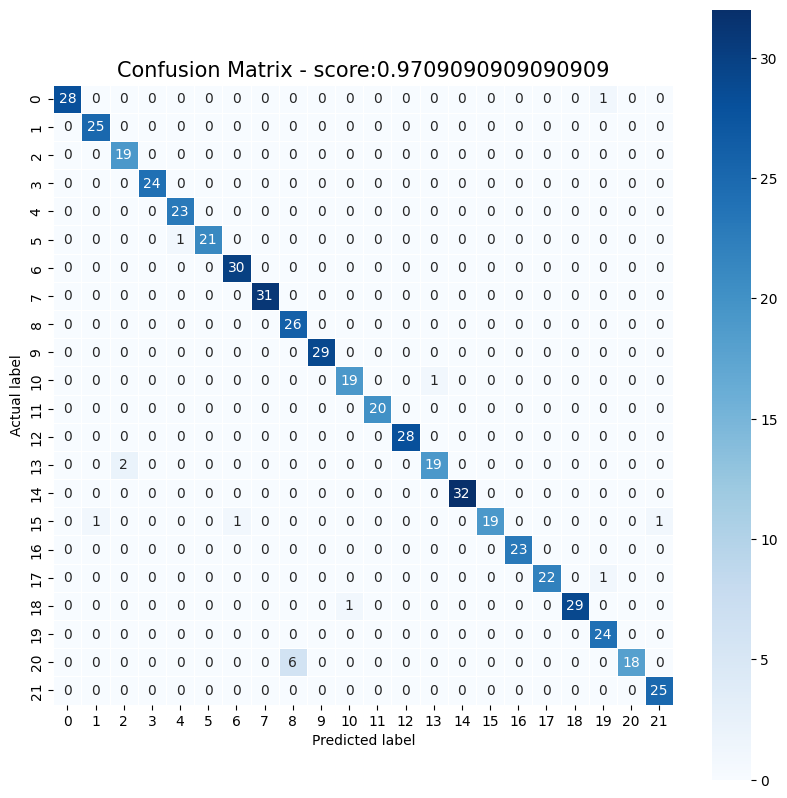

In [79]:
from sklearn.metrics import accuracy_score #This line imports the accuracy_score function from scikit-learn's metrics module, which is used to calculate the accuracy of a classification model.

from sklearn.metrics import confusion_matrix #This line imports the confusion_matrix function from scikit-learn's metrics module, which is used to compute the confusion matrix to evaluate the accuracy of a classification.

cm = confusion_matrix(Ytest, predicted_values_test) #This line calculates the confusion matrix using the true labels (Ytest) and the predicted labels (predicted_values_test) from the random forest classifier.

plt.figure(figsize=(10,10)) #This line initializes a new figure with a size of 10x10 inches for the heatmap plot.

sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');  #This line creates a heatmap using Seaborn's heatmap function to visualize the confusion matrix.
                                                                                      #The annot=True parameter displays the numerical values in each cell, fmt=".0f" formats the displayed values as integers,
                                                                                      #linewidths=.5 sets the width of the lines between cells, square=True makes the plot square-shaped,
                                                                                      #and cmap='Blues' sets the color map to shades of blue.


plt.ylabel('Actual label'); #This line sets the label for the y-axis of the plot as 'Actual label'.

plt.xlabel('Predicted label'); #This line sets the label for the x-axis of the plot as 'Predicted label'.

all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(Ytest, predicted_values_test)) #This line creates a title for the plot that includes the accuracy score calculated using the accuracy_score function.

plt.title(all_sample_title, size = 15); #This line sets the title of the plot to all_sample_title with a font size of 15.

plt.show() #This line displays the plot.

### Saving trained Random Forest model

In [80]:
import pickle  #Imports the pickle module, which is used for serializing and deserializing Python objects.

# Dump the trained Naive Bayes classifier with Pickle

RF_pkl_filename = '/content/gdrive/My Drive/models/RandomForest.pkl' #Specifies the file path where the pickled Random Forest model will be saved. The model will be saved with the filename "RandomForest.pkl" in the specified directory.
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb') #Opens the file specified by RF_pkl_filename in binary write mode ('wb') to save the pickled model. The file is opened as a binary file since pickle deals with binary data.

pickle.dump(RF, RF_Model_pkl) #Serializes and writes the trained Random Forest classifier (RF) to the opened pickle file (RF_Model_pkl). This saves the model as a binary file.
# Close the pickle instances
RF_Model_pkl.close() #Closes the pickle file after writing the model. It's important to close the file to ensure that all data is written to disk properly.

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

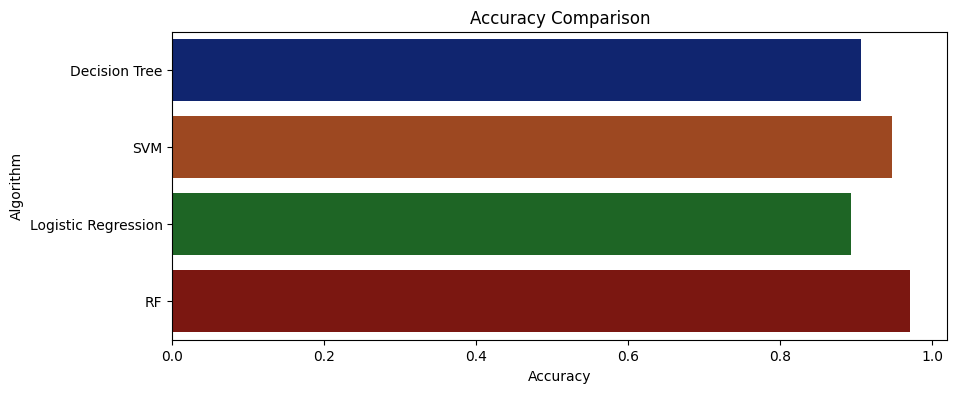

In [81]:
plt.figure(figsize=[10,4],dpi = 100) #This line creates a new figure with a specified size of 10 inches in width and 4 inches in height, with a DPI (dots per inch) of 100.

plt.title('Accuracy Comparison') #This line sets the title of the plot to 'Accuracy Comparison'.

plt.xlabel('Accuracy') #This line sets the label for the x-axis to 'Accuracy'.

plt.ylabel('Algorithm') #This line sets the label for the y-axis to 'Algorithm'.

sns.barplot(x = acc,y = model,palette='dark') # This line creates a bar plot using Seaborn (sns). It takes the accuracy values (acc) on the x-axis and the model names (model) on the y-axis.
                                              # The color palette is set to 'dark'.

#Inside the loop we print the name of models and there accuracy.

In [82]:
accuracy_models = dict(zip(model, acc)) #This line creates a dictionary accuracy_models by zipping together the model list (containing algorithm names) and ,
                                        #the acc list (containing their corresponding accuracies).

for k, v in accuracy_models.items(): #This line initiates a loop over each key-value pair in the accuracy_models dictionary. k represents the key (algorithm name) and v represents the value (accuracy).

    print (k, '-->', v) #Inside the loop, this line prints each algorithm name (k) followed by an arrow (-->) and its corresponding accuracy (v).

Decision Tree --> 0.9054545454545454
SVM --> 0.9472727272727273
Logistic Regression --> 0.8927272727272727
RF --> 0.9709090909090909


## Making a prediction

In [83]:
data = np.array([[101,87,54,29,76,6.3,100]]) #This line creates a NumPy array containing the features of a new data point.
                                              #The features are: N=101, P=87, K=54, temperature=29, humidity=76, pH=6.3, and rainfall=100.

prediction = RF.predict(data)[0] #It predicts the label (crop) for the new data point using the trained Random Forest classifier (RF). The predicted label is stored in the prediction variable.

print("{} is a best crop to be cultivated. ".format(prediction)) #It prints out the predicted crop based on the features of the new data point.

banana is a best crop to be cultivated. 


#Here we create a funcation for  recommendation.

In [84]:
def recommendation(N,P,k,temperature,humidity,ph,rainfal): #This line defines a function named recommendation that accepts seven parameters: N, P, K, temperature, humidity, pH, and rainfall.

    features = np.array([[N,P,k,temperature,humidity,ph,rainfal]]) #It creates a NumPy array containing the values of the input features.

    prediction = RF.predict(features)[0] #It predicts the label (crop) for the input features using the trained Random Forest classifier (RF).

    return prediction # It returns the predicted crop as the output of the function.

#Here we call the funcation of recommendation.

In [85]:
N = 2                     #Assigns the value 2 to the variable N.
P = 123                   #Assigns the value 123 to the variable P.
k = 198                   #Assigns the value 198 to the variable k.
temperature = 39.64       #Assigns the value 39.64 to the variable temperature.
humidity = 82.21          #Assigns the value 82.21 to the variable humidity.
ph = 6.25                 #Assigns the value 6.25 to the variable ph.
rainfall = 70.39          #Assigns the value 70.39 to the variable rainfall.

predict = recommendation(N,P,k,temperature,humidity,ph,rainfall)  #Calls the recommendation function with the provided values of N, P, K, temperature, humidity, pH, and rainfall and assigns the returned prediction to the variable predict.

print("{} is a best crop to be cultivated. ".format(predict))     #Prints the predicted crop as output using string formatting.

grapes is a best crop to be cultivated. 
